<h1 align=center><font size = 5>Segmenting and Clustering Municipalities & Neighborhoods in Athens, Greece</font></h1>

## Introduction

In this lab, you will learn how to convert addresses into their equivalent latitude and 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Scrape and Explore Datasets</a>

2. <a href="#item2">Explore Municipalities & Neighborhoods in Athens, Greece</a>

3. <a href="#item3">Analyze Each Municipality and Each Neighborhood</a>

4. <a href="#item4">Cluster Municipalities and Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
#1st cell run
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
#!pip install opencage

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates
#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

import seaborn as sns

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium #map rendering library

#Requests to request web pages by making get requests to FourSquare REST Client
import requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

import json # library to handle JSON files
#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.1.3
Libraries imported


## 1. Scrape and Explore Datasets

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

#### Scrape and transform the data into a *pandas* dataframe

In [2]:
ath_pref = pd.read_html('https://en.wikipedia.org/wiki/Athens_Prefecture')[1]

In [3]:
ath_pref.drop(['YPES Code'], axis=1, inplace= True)

In [4]:
ath_pref.drop([48], inplace= True)

In [5]:
ath_pref

Municipality                               Seat  \
0         Agia Varvara (Αγία Βαρβάρα)        Agia Varvara (Αγία Βαρβάρα)   
1     Agia Paraskevi (Αγία Παρασκευή)    Agia Paraskevi (Αγία Παρασκευή)   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3   Agios Dimitrios (Άγιος Δημήτριος)                 Brahami (Μπραχάμι)   
4                   Aigaleo (Αιγάλεω)                  Aigaleo (Αιγάλεω)   
5                     Alimos (Άλιμος)                Kalamaki (Καλαμάκι)   
6                   Marousi (Μαρούσι)                  Marousi (Μαρούσι)   
7           Argyroupoli (Αργυρούπολη)          Argyroupoli (Αργυρούπολη)   
8                      Athens (Αθήνα)                     Athens (Αθήνα)   
9                  Chaidari (Χαϊδάρι)                 Chaidari (Χαϊδάρι)   
10               Chalandri (Χαλάνδρι)               Chalandri (Χαλάνδρι)   
11               Cholargos (Χολαργός)               Cholargos (Χολαργός)   
12                      Dafni (Δάφνη)                      Dafni (Δάφνη)   
13                      Ekali (Εκάλη)                      Ekali (Εκάλη)   
14                Elliniko (Ελληνικό)                Elliniko (Ελληνικό)   
15                 Filothei (Φιλοθέη)                 Filothei (Φιλοθέη)   
16                  Galatsi (Γαλάτσι)                  Galatsi (Γαλάτσι)   
17                  Glyfada (Γλυφάδα)                  Glyfada (Γλυφάδα)   
18                      Ilion (Ίλιον)            Nea Liosia (Νέα Λιόσια)   
19              Ilioupoli (Ηλιούπολη)              Ilioupoli (Ηλιούπολη)   
20                Irakleio (Ηράκλειο)        Neo Irakleio (Νέο Ηράκλειο)   
21            Kaisariani (Καισαριανή)            Kaisariani (Καισαριανή)   
22               Kallithea (Καλλιθέα)               Kallithea (Καλλιθέα)   
23                Kamatero (Καματερό)                Kamatero (Καματερό)   
24                  Kifisia (Κηφισιά)                  Kifisia (Κηφισιά)   
25              Lykovrysi (Λυκόβρυση)              Lykovrysi (Λυκόβρυση)   
26                Melissia (Μελίσσια)                Melissia (Μελίσσια)   
27          Metamorfosi (Μεταμόρφωση)      Koukouvaounes (Κουκουβάουνες)   
28                 Moschato (Μοσχάτο)                 Moschato (Μοσχάτο)   
29     Nea Chalkidona (Νέα Χαλκηδόνα)     Nea Chalkidona (Νέα Χαλκηδόνα)   
30       Nea Erythraia (Νέα Ερυθραία)       Nea Erythraia (Νέα Ερυθραία)   
31              Nea Ionia (Νέα Ιωνία)              Nea Ionia (Νέα Ιωνία)   
32  Nea Filadelfeia (Νέα Φιλαδέλφεια)  Nea Filadelfeia (Νέα Φιλαδέλφεια)   
33            Nea Smyrni (Νέα Σμύρνη)            Nea Smyrni (Νέα Σμύρνη)   
34          Nea Penteli (Νέα Πεντέλη)          Nea Penteli (Νέα Πεντέλη)   
35          Neo Psychiko (Νέο Ψυχικό)          Neo Psychiko (Νέο Ψυχικό)   
36             Palaio Faliro (Φάληρο)      Palaio Faliro (Παλαιό Φάληρο)   
37                  Papagou (Παπάγου)                  Papagou (Παπάγου)   
38                      Pefki (Πεύκη)                      Pefki (Πέυκη)   
39                  Penteli (Πεντέλη)                  Penteli (Πεντέλη)   
40              Peristeri (Περιστέρι)              Peristeri (Περιστέρι)   
41            Petroupoli (Πετρούπολη)            Petroupoli (Πετρούπολη)   
42                  Psychiko (Ψυχικό)    Palaio Psychiko (Παλαιό Ψυχικό)   
43                    Tavros (Ταύρος)                    Tavros (Ταύρος)   
44              Vrilissia (Βριλήσσια)                 Analipsi (Ανάληψη)   
45                  Vyronas (Βύρωνας)                  Vironas (Βύρωνας)   
46                  Ymittos (Υμηττός)                  Ymittos (Υμηττός)   
47                Zografou (Ζωγράφου)                Zografou (Ζωγράφου)   

    Population  Area (km2)  Density (/km2)  
0        30562       2.425           12603  
1        59500       7.967            7498  
2        32957       3.200           10299  
3        65173       4.949           13169  
4        74046       6.450           11480  
5        38047       5.909    

Now I will do the same for the Neighborhoods of the Municipality of Athens or Central Athens

In [6]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Athens").text
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')
# create a list to store neighborhood data
neighborhoodList = []
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
ath_neigh = pd.DataFrame({"Neighborhood": neighborhoodList})

ath_neigh

Neighborhood
0                     Aerides, Athens
1           Agios Eleftherios, Athens
2         Agios Panteleimonas, Athens
3                   Akadimia Platonos
4                    Akadimia, Athens
5                 Ampelokipoi, Athens
6                          Anafiotika
7                       Ano Petralona
8                       Asteroskopeio
9                   Asyrmatos, Athens
10                     Attiki, Athens
11                           Elaionas
12                        Ellinoroson
13                   Erythros Stavros
14               Evangelismos, Athens
15                          Exarcheia
16                       Gazi, Athens
17                 Girokomeio, Athens
18                              Goudi
19                      Gouva, Athens
20                               Gyzi
21                     Ilisia, Athens
22                       Kallimarmaro
23               Kallimarmaro, Athens
24                         Kerameikos
25                        Kolokynthou
26                           Kolonaki
27                            Kolonos
28                            Koukaki
29                     Kountouriotika
30                        Kynosargous
31                          Kypriadou
32                    Kypseli, Athens
33                Makrygianni, Athens
34                       Metaxourgeio
35                       Mets, Athens
36                        Monastiraki
37                   Mount Lycabettus
38                       Nea Filothei
39                    Neapoli, Athens
40                Neos Kosmos, Athens
41                    Omonoia, Athens
42                           Pangrati
43                            Patisia
44                   Pedion tou Areos
45                          Petralona
46                        Philopappou
47                              Plaka
48                   Polygono, Athens
49                           Probonas
50            Profitis Daniil, Athens
51             Profitis Ilias, Athens
52                              Psyri
53                          Rizoupoli
54                       Rouf, Athens
55                            Sepolia
56                        Skouze Hill
57                            Thiseio
58                         Thymarakia
59                      Treis Gefyres
60                      Vathi, Athens
61                          Votanikos
62  Template:Neighbourhoods in Athens

In [7]:
ath_neigh.drop([62], inplace= True)
ath_neigh

Neighborhood
0               Aerides, Athens
1     Agios Eleftherios, Athens
2   Agios Panteleimonas, Athens
3             Akadimia Platonos
4              Akadimia, Athens
5           Ampelokipoi, Athens
6                    Anafiotika
7                 Ano Petralona
8                 Asteroskopeio
9             Asyrmatos, Athens
10               Attiki, Athens
11                     Elaionas
12                  Ellinoroson
13             Erythros Stavros
14         Evangelismos, Athens
15                    Exarcheia
16                 Gazi, Athens
17           Girokomeio, Athens
18                        Goudi
19                Gouva, Athens
20                         Gyzi
21               Ilisia, Athens
22                 Kallimarmaro
23         Kallimarmaro, Athens
24                   Kerameikos
25                  Kolokynthou
26                     Kolonaki
27                      Kolonos
28                      Koukaki
29               Kountouriotika
30                  Kynosargous
31                    Kypriadou
32              Kypseli, Athens
33          Makrygianni, Athens
34                 Metaxourgeio
35                 Mets, Athens
36                  Monastiraki
37             Mount Lycabettus
38                 Nea Filothei
39              Neapoli, Athens
40          Neos Kosmos, Athens
41              Omonoia, Athens
42                     Pangrati
43                      Patisia
44             Pedion tou Areos
45                    Petralona
46                  Philopappou
47                        Plaka
48             Polygono, Athens
49                     Probonas
50      Profitis Daniil, Athens
51       Profitis Ilias, Athens
52                        Psyri
53                    Rizoupoli
54                 Rouf, Athens
55                      Sepolia
56                  Skouze Hill
57                      Thiseio
58                   Thymarakia
59                Treis Gefyres
60                Vathi, Athens
61                    Votanikos

In [8]:
# print the number of rows of the dataframe
ath_neigh.shape

(62, 1)

In [9]:
new = ath_neigh["Neighborhood"].str.split(",", n = 1, expand = True) 
ath_neigh["Neighborhood"]= new[0]
ath_neigh["City"]= new[1] 
ath_neigh.drop(['City'], axis=1, inplace= True)
ath_neigh

Neighborhood
0               Aerides
1     Agios Eleftherios
2   Agios Panteleimonas
3     Akadimia Platonos
4              Akadimia
5           Ampelokipoi
6            Anafiotika
7         Ano Petralona
8         Asteroskopeio
9             Asyrmatos
10               Attiki
11             Elaionas
12          Ellinoroson
13     Erythros Stavros
14         Evangelismos
15            Exarcheia
16                 Gazi
17           Girokomeio
18                Goudi
19                Gouva
20                 Gyzi
21               Ilisia
22         Kallimarmaro
23         Kallimarmaro
24           Kerameikos
25          Kolokynthou
26             Kolonaki
27              Kolonos
28              Koukaki
29       Kountouriotika
30          Kynosargous
31            Kypriadou
32              Kypseli
33          Makrygianni
34         Metaxourgeio
35                 Mets
36          Monastiraki
37     Mount Lycabettus
38         Nea Filothei
39              Neapoli
40          Neos Kosmos
41              Omonoia
42             Pangrati
43              Patisia
44     Pedion tou Areos
45            Petralona
46          Philopappou
47                Plaka
48             Polygono
49             Probonas
50      Profitis Daniil
51       Profitis Ilias
52                Psyri
53            Rizoupoli
54                 Rouf
55              Sepolia
56          Skouze Hill
57              Thiseio
58           Thymarakia
59        Treis Gefyres
60                Vathi
61            Votanikos

#### Now let's load the coordinates for each dataframe using geopy library in order to get the latitude and longitude values of Municipalities and Neighborhoods in Athens

In [10]:
# get the coordinates of Athens
address = 'Athens, Greece'

geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Athens are 37.9839412, 23.7283052.


In [11]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Athens, Greece'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [12]:
# call the function to get the coordinates, store in a new list using list comprehension
coords_ath_pref = [ get_latlng(municipality) for municipality in ath_pref['Municipality'].tolist() ]
coords_ath_pref

[[37.99537000000004, 23.661860000000047],
 [38.01356000000004, 23.821750000000065],
 [38.02648000000005, 23.717880000000036],
 [37.93978000000004, 23.73147000000006],
 [37.992740000000026, 23.680430000000058],
 [37.91467000000006, 23.705440000000067],
 [38.04826000000003, 23.797180000000026],
 [37.91557000000006, 23.750080000000025],
 [37.976830000000064, 23.70989000000003],
 [38.003030000000024, 23.663760000000025],
 [38.02242000000007, 23.794140000000027],
 [38.00361000000004, 23.798460000000034],
 [37.94751578151292, 23.772295202488152],
 [38.088016972573826, 23.814780375692337],
 [37.881530000000055, 23.728390000000047],
 [38.0425560445156, 23.771567229153185],
 [38.01306000000005, 23.752650000000074],
 [37.869650000000036, 23.738910000000033],
 [38.03051000000005, 23.71264000000008],
 [37.93672000000004, 23.742980000000045],
 [35.334280000000035, 25.123050000000035],
 [37.96909000000005, 23.75484000000006],
 [37.95501000000007, 23.71162000000004],
 [38.06037481912717, 23.707806533

#### Let's embody the coordinates into the corresposding dataframe

In [13]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords_ath_pref=pd.DataFrame(coords_ath_pref,columns =['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
ath_pref['Latitude']=df_coords_ath_pref['Latitude']
ath_pref['Longitude']=df_coords_ath_pref['Longitude']

# check the neighborhoods and the coordinates
ath_pref

Municipality                               Seat  \
0         Agia Varvara (Αγία Βαρβάρα)        Agia Varvara (Αγία Βαρβάρα)   
1     Agia Paraskevi (Αγία Παρασκευή)    Agia Paraskevi (Αγία Παρασκευή)   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3   Agios Dimitrios (Άγιος Δημήτριος)                 Brahami (Μπραχάμι)   
4                   Aigaleo (Αιγάλεω)                  Aigaleo (Αιγάλεω)   
5                     Alimos (Άλιμος)                Kalamaki (Καλαμάκι)   
6                   Marousi (Μαρούσι)                  Marousi (Μαρούσι)   
7           Argyroupoli (Αργυρούπολη)          Argyroupoli (Αργυρούπολη)   
8                      Athens (Αθήνα)                     Athens (Αθήνα)   
9                  Chaidari (Χαϊδάρι)                 Chaidari (Χαϊδάρι)   
10               Chalandri (Χαλάνδρι)               Chalandri (Χαλάνδρι)   
11               Cholargos (Χολαργός)               Cholargos (Χολαργός)   
12                      Dafni (Δάφνη)                      Dafni (Δάφνη)   
13                      Ekali (Εκάλη)                      Ekali (Εκάλη)   
14                Elliniko (Ελληνικό)                Elliniko (Ελληνικό)   
15                 Filothei (Φιλοθέη)                 Filothei (Φιλοθέη)   
16                  Galatsi (Γαλάτσι)                  Galatsi (Γαλάτσι)   
17                  Glyfada (Γλυφάδα)                  Glyfada (Γλυφάδα)   
18                      Ilion (Ίλιον)            Nea Liosia (Νέα Λιόσια)   
19              Ilioupoli (Ηλιούπολη)              Ilioupoli (Ηλιούπολη)   
20                Irakleio (Ηράκλειο)        Neo Irakleio (Νέο Ηράκλειο)   
21            Kaisariani (Καισαριανή)            Kaisariani (Καισαριανή)   
22               Kallithea (Καλλιθέα)               Kallithea (Καλλιθέα)   
23                Kamatero (Καματερό)                Kamatero (Καματερό)   
24                  Kifisia (Κηφισιά)                  Kifisia (Κηφισιά)   
25              Lykovrysi (Λυκόβρυση)              Lykovrysi (Λυκόβρυση)   
26                Melissia (Μελίσσια)                Melissia (Μελίσσια)   
27          Metamorfosi (Μεταμόρφωση)      Koukouvaounes (Κουκουβάουνες)   
28                 Moschato (Μοσχάτο)                 Moschato (Μοσχάτο)   
29     Nea Chalkidona (Νέα Χαλκηδόνα)     Nea Chalkidona (Νέα Χαλκηδόνα)   
30       Nea Erythraia (Νέα Ερυθραία)       Nea Erythraia (Νέα Ερυθραία)   
31              Nea Ionia (Νέα Ιωνία)              Nea Ionia (Νέα Ιωνία)   
32  Nea Filadelfeia (Νέα Φιλαδέλφεια)  Nea Filadelfeia (Νέα Φιλαδέλφεια)   
33            Nea Smyrni (Νέα Σμύρνη)            Nea Smyrni (Νέα Σμύρνη)   
34          Nea Penteli (Νέα Πεντέλη)          Nea Penteli (Νέα Πεντέλη)   
35          Neo Psychiko (Νέο Ψυχικό)          Neo Psychiko (Νέο Ψυχικό)   
36             Palaio Faliro (Φάληρο)      Palaio Faliro (Παλαιό Φάληρο)   
37                  Papagou (Παπάγου)                  Papagou (Παπάγου)   
38                      Pefki (Πεύκη)                      Pefki (Πέυκη)   
39                  Penteli (Πεντέλη)                  Penteli (Πεντέλη)   
40              Peristeri (Περιστέρι)              Peristeri (Περιστέρι)   
41            Petroupoli (Πετρούπολη)            Petroupoli (Πετρούπολη)   
42                  Psychiko (Ψυχικό)    Palaio Psychiko (Παλαιό Ψυχικό)   
43                    Tavros (Ταύρος)                    Tavros (Ταύρος)   
44              Vrilissia (Βριλήσσια)                 Analipsi (Ανάληψη)   
45                  Vyronas (Βύρωνας)                  Vironas (Βύρωνας)   
46                  Ymittos (Υμηττός)                  Ymittos (Υμηττός)   
47                Zografou (Ζωγράφου)                Zografou (Ζωγράφου)   

    Population  Area (km2)  Density (/km2)   Latitude  Longitude  
0        30562       2.425           12603  37.995370  23.661860  
1        59500       7.967            7498  38.013560  23.821750  
2        32957       3.200           10299  38.026480  23.717880  
3        65173       4.949      

#### Let's do the same for the Neighborhoods of Central Athens

In [14]:
# call the function to get the coordinates, store in a new list using list comprehension
coords_ath_neigh = [ get_latlng(neighborhood) for neighborhood in ath_neigh['Neighborhood'].tolist() ]
coords_ath_neigh

[[37.97614000000004, 23.73640000000006],
 [38.01997000000006, 23.726270000000056],
 [37.96266000000003, 23.625720000000058],
 [37.990950000000055, 23.70718000000005],
 [37.98675000000003, 23.71103000000005],
 [37.99106000000006, 23.764290000000074],
 [37.972240000000056, 23.72852000000006],
 [37.96948000000003, 23.70897000000008],
 [37.97438000000005, 23.719200000000058],
 [38.00678000000005, 23.881790000000024],
 [37.97614000000004, 23.73640000000006],
 [37.96667000000008, 23.669400000000053],
 [37.99793000000005, 23.775160000000028],
 [37.992680349285855, 23.767630320154506],
 [37.97730000000007, 23.74726000000004],
 [37.988170000000025, 23.733610000000056],
 [37.97462040185835, 23.76454530087124],
 [40.29047000000003, 21.775090000000034],
 [37.982920000000036, 23.770980000000066],
 [37.95998000000003, 23.740830000000074],
 [38.02047498933519, 23.84525292476216],
 [37.976410000000044, 23.755570000000034],
 [37.96691000000004, 23.74022000000008],
 [37.96691000000004, 23.74022000000008

In [15]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords_ath_neigh=pd.DataFrame(coords_ath_neigh,columns =['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
ath_neigh['Latitude']=df_coords_ath_neigh['Latitude']
ath_neigh['Longitude']=df_coords_ath_neigh['Longitude']

#drop the neighborhoods that do not correspond to real coordinates

# check the neighborhoods and the coordinates
ath_neigh

Neighborhood   Latitude  Longitude
0               Aerides  37.976140  23.736400
1     Agios Eleftherios  38.019970  23.726270
2   Agios Panteleimonas  37.962660  23.625720
3     Akadimia Platonos  37.990950  23.707180
4              Akadimia  37.986750  23.711030
5           Ampelokipoi  37.991060  23.764290
6            Anafiotika  37.972240  23.728520
7         Ano Petralona  37.969480  23.708970
8         Asteroskopeio  37.974380  23.719200
9             Asyrmatos  38.006780  23.881790
10               Attiki  37.976140  23.736400
11             Elaionas  37.966670  23.669400
12          Ellinoroson  37.997930  23.775160
13     Erythros Stavros  37.992680  23.767630
14         Evangelismos  37.977300  23.747260
15            Exarcheia  37.988170  23.733610
16                 Gazi  37.974620  23.764545
17           Girokomeio  40.290470  21.775090
18                Goudi  37.982920  23.770980
19                Gouva  37.959980  23.740830
20                 Gyzi  38.020475  23.845253
21               Ilisia  37.976410  23.755570
22         Kallimarmaro  37.966910  23.740220
23         Kallimarmaro  37.966910  23.740220
24           Kerameikos  37.979190  23.719200
25          Kolokynthou  37.996760  23.706090
26             Kolonaki  37.977620  23.743590
27              Kolonos  37.993340  23.716370
28              Koukaki  37.963720  23.723530
29       Kountouriotika  37.988560  23.735324
30          Kynosargous  38.023995  23.673820
31            Kypriadou  37.993974  23.745041
32              Kypseli  38.003280  23.740600
33          Makrygianni  37.968070  23.726870
34         Metaxourgeio  37.983040  23.718690
35                 Mets  37.965220  23.735810
36          Monastiraki  37.975220  23.727560
37     Mount Lycabettus  37.978000  23.736560
38         Nea Filothei  37.996820  23.763110
39              Neapoli  37.986780  23.741480
40          Neos Kosmos  37.961420  23.728710
41              Omonoia  37.987090  23.726720
42             Pangrati  37.969730  23.747300
43              Patisia  38.020190  23.735610
44     Pedion tou Areos  37.995420  23.740740
45            Petralona  37.969480  23.708970
46          Philopappou  37.964829  23.719318
47                Plaka  37.973520  23.729150
48             Polygono  38.002620  23.751310
49             Probonas  37.976140  23.736400
50      Profitis Daniil  37.984620  23.712180
51       Profitis Ilias  38.070850  23.809050
52                Psyri  37.978760  23.726670
53            Rizoupoli  38.029000  23.738770
54                 Rouf  37.976830  23.709890
55              Sepolia  38.004770  23.717940
56          Skouze Hill  37.977295  23.728683
57              Thiseio  37.974810  23.715920
58           Thymarakia  37.979480  23.643680
59        Treis Gefyres  37.976140  23.736400
60                Vathi  37.778580  26.888040
61            Votanikos  37.982830  23.700430

#### Creating a map of Athens with Municipalities superimposed on top.

In [16]:
# create map of Athens using latitude and longitude values
map_athens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ath_pref['Latitude'], ath_pref['Longitude'], ath_pref['Municipality']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_athens) 
    
map_athens

#### Now doing the same for the Neighborhoods of Central Athens

In [17]:
# create map of Athens Centre using latitude and longitude values
map_central_athens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ath_neigh['Latitude'], ath_neigh['Longitude'], ath_neigh['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_central_athens) 
    
map_central_athens

#### Define Foursquare Credentials and Version

In [18]:
# @hidden_cell
CLIENT_ID = '4E44LNG20KA0FT4ZKX3M23YLHAZEZKA1SJOW0WGJZBCPU0Y3' # your Foursquare ID
CLIENT_SECRET = 'H0RLI51YDXBVZSLKY5ID1NKVAMKZCTGD5XFLEWSQDMBOJ0C4' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4E44LNG20KA0FT4ZKX3M23YLHAZEZKA1SJOW0WGJZBCPU0Y3
CLIENT_SECRET:H0RLI51YDXBVZSLKY5ID1NKVAMKZCTGD5XFLEWSQDMBOJ0C4


#### Let's explore the Central Athens Prefecture and the first neighborhood in our dataframe.

Get the municipality and neighborhood's name.

In [19]:
ath_pref.loc[8, 'Municipality']

'Athens (Αθήνα)'

In [20]:
ath_neigh.loc[0, 'Neighborhood']

'Aerides'

Get the municipality's latitude and longitude values.

In [21]:
municipality_latitude = ath_pref.loc[8, 'Latitude'] # municipality latitude value
municipality_longitude = ath_pref.loc[8, 'Longitude'] # municipality longitude value

municipality_name = ath_pref.loc[8, 'Municipality'] # municipality name

print('Latitude and longitude values of {} are {}, {}.'.format(municipality_latitude, 
                                                               municipality_longitude, 
                                                               municipality_name))

Latitude and longitude values of 37.976830000000064 are 23.70989000000003, Athens (Αθήνα).


#### Now, let's get the top 1000 venues that are in Athens Prefecture within a radius of 2000 meters.

In [22]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 2000# define radius

# create URL
m_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    municipality_latitude, 
    municipality_longitude, 
    radius, 
    LIMIT)
m_url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4E44LNG20KA0FT4ZKX3M23YLHAZEZKA1SJOW0WGJZBCPU0Y3&client_secret=H0RLI51YDXBVZSLKY5ID1NKVAMKZCTGD5XFLEWSQDMBOJ0C4&v=20180605&ll=37.976830000000064,23.70989000000003&radius=2000&limit=1000'

In [23]:
m_results = requests.get(m_url).json()


In [24]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
m_venues = m_results['response']['groups'][0]['items']
    
m_nearby_venues = json_normalize(m_venues) # flatten JSON

# filter columns
m_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
m_nearby_venues =m_nearby_venues.loc[:, m_filtered_columns]

# filter the category for each row
m_nearby_venues['venue.categories'] = m_nearby_venues.apply(get_category_type, axis=1)

# clean columns
m_nearby_venues.columns = [col.split(".")[-1] for col in m_nearby_venues.columns]

m_nearby_venues.head()

C:\Users\dimitris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name    categories        lat        lng
0                Gym Spot           Gym  37.978425  23.710989
1             Upupa Epops  Cocktail Bar  37.974199  23.710181
2    The Lazy Bulldog Pub           Pub  37.977329  23.713107
3  A Little Taste of Home    Restaurant  37.978489  23.710242
4                    Λόλα          Café  37.974174  23.711126

In [26]:
print('{} venues were returned by Foursquare.'.format(m_nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [27]:
print ('{} unique categories in Athens'.format(m_nearby_venues['categories'].value_counts().shape[0]))


49 unique categories in Athens


## Now let's do the same for the neighborhood.

In [28]:
neighborhood_latitude = ath_neigh.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = ath_neigh.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = ath_neigh.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Aerides are 37.97614000000004, 23.73640000000006.


#### Let's get the top 100 venues that are in Aerides, Athens within a radius of 500 meters.

In [29]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius
# create URL
n_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
n_url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=4E44LNG20KA0FT4ZKX3M23YLHAZEZKA1SJOW0WGJZBCPU0Y3&client_secret=H0RLI51YDXBVZSLKY5ID1NKVAMKZCTGD5XFLEWSQDMBOJ0C4&v=20180605&ll=37.97614000000004,23.73640000000006&radius=500&limit=100'

In [30]:
n_results = requests.get(n_url).json()


In [31]:
n_venues = n_results['response']['groups'][0]['items']
    
n_nearby_venues = json_normalize(n_venues) # flatten JSON

# filter columns
n_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
n_nearby_venues =n_nearby_venues.loc[:, n_filtered_columns]

# filter the category for each row
n_nearby_venues['venue.categories'] = n_nearby_venues.apply(get_category_type, axis=1)

# clean columns
n_nearby_venues.columns = [col.split(".")[-1] for col in n_nearby_venues.columns]

n_nearby_venues.head()

C:\Users\dimitris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name categories        lat        lng
0              Louis Vuitton   Boutique  37.977704  23.736446
1             Toyroom Athens  Nightclub  37.977593  23.735721
2      Hotel Grande Bretagne      Hotel  37.976418  23.735515
3  GB Roof Garden Restaurant  Roof Deck  37.976116  23.735301
4                     GB Spa        Spa  37.976240  23.735361

In [32]:
print('{} venues were returned by Foursquare.'.format(n_nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [33]:
print ('{} unique categories in Aerides, Athens'.format(n_nearby_venues['categories'].value_counts().shape[0]))


53 unique categories in Aerides, Athens


## 2. Explore Municipalities & Neighborhoods in Athens, Greece

#### Let's create a function to repeat the same process to all the municipalities and neighborhoods in Athens

In [34]:
def m_getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Municipality', 
                  'Municipality Latitude', 
                  'Municipality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
athens_pref_venues = m_getNearbyVenues(names=ath_pref['Municipality'],
                                   latitudes=ath_pref['Latitude'],
                                   longitudes=ath_pref['Longitude']
                                  )

Agia Varvara (Αγία Βαρβάρα)
Agia Paraskevi (Αγία Παρασκευή)
Agioi Anargyroi (Άγιοι Ανάργυροι)
Agios Dimitrios (Άγιος Δημήτριος)
Aigaleo (Αιγάλεω)
Alimos (Άλιμος)
Marousi (Μαρούσι)
Argyroupoli (Αργυρούπολη)
Athens (Αθήνα)
Chaidari (Χαϊδάρι)
Chalandri (Χαλάνδρι)
Cholargos (Χολαργός)
Dafni (Δάφνη)
Ekali (Εκάλη)
Elliniko (Ελληνικό)
Filothei (Φιλοθέη)
Galatsi (Γαλάτσι)
Glyfada (Γλυφάδα)
Ilion (Ίλιον)
Ilioupoli (Ηλιούπολη)
Irakleio (Ηράκλειο)
Kaisariani (Καισαριανή)
Kallithea (Καλλιθέα)
Kamatero (Καματερό)
Kifisia (Κηφισιά)
Lykovrysi (Λυκόβρυση)
Melissia (Μελίσσια)
Metamorfosi (Μεταμόρφωση)
Moschato (Μοσχάτο)
Nea Chalkidona (Νέα Χαλκηδόνα)
Nea Erythraia (Νέα Ερυθραία)
Nea Ionia (Νέα Ιωνία)
Nea Filadelfeia (Νέα Φιλαδέλφεια)
Nea Smyrni (Νέα Σμύρνη)
Nea Penteli (Νέα Πεντέλη)
Neo Psychiko (Νέο Ψυχικό)
Palaio Faliro (Φάληρο)
Papagou (Παπάγου)
Pefki (Πεύκη)
Penteli (Πεντέλη)
Peristeri (Περιστέρι)
Petroupoli (Πετρούπολη)
Psychiko (Ψυχικό)
Tavros (Ταύρος)
Vrilissia (Βριλήσσια)
Vyronas (Βύρωνας)
Ymit

In [36]:
print(athens_pref_venues.shape)
athens_pref_venues.head()

(4700, 7)


Municipality  Municipality Latitude  Municipality Longitude  \
0  Agia Varvara (Αγία Βαρβάρα)               37.99537                23.66186   
1  Agia Varvara (Αγία Βαρβάρα)               37.99537                23.66186   
2  Agia Varvara (Αγία Βαρβάρα)               37.99537                23.66186   
3  Agia Varvara (Αγία Βαρβάρα)               37.99537                23.66186   
4  Agia Varvara (Αγία Βαρβάρα)               37.99537                23.66186   

                   Venue  Venue Latitude  Venue Longitude    Venue Category  
0         Qahwa Roastery       38.001266        23.663079       Coffee Shop  
1  Xalvadopoiia Kosmidis       37.996092        23.662673      Dessert Shop  
2               Το Δράμι       37.987733        23.659452  Greek Restaurant  
3                  NoVeM       38.004559        23.664175              Café  
4       Θεωρία του House       37.994967        23.672446              Café

In [37]:
print (athens_pref_venues['Venue Category'].value_counts())


Café                               449
Greek Restaurant                   226
Dessert Shop                       190
Bar                                187
Coffee Shop                        183
Bakery                             168
Souvlaki Shop                      138
Meze Restaurant                    137
Supermarket                        113
Gym                                107
Plaza                               97
Park                                91
Gym / Fitness Center                83
Cocktail Bar                        82
Taverna                             76
Italian Restaurant                  75
Ice Cream Shop                      69
Movie Theater                       64
Pizza Place                         60
Grilled Meat Restaurant             57
Seafood Restaurant                  52
Burger Joint                        48
Restaurant                          47
Snack Place                         39
Playground                          35
Soccer Field             

Let's check how many venues were returned for each municipality.

In [38]:
athens_pref_venues.groupby('Municipality').count()

Municipality Latitude  \
Municipality                                               
Agia Paraskevi (Αγία Παρασκευή)                      100   
Agia Varvara (Αγία Βαρβάρα)                          100   
Agioi Anargyroi (Άγιοι Ανάργυροι)                    100   
Agios Dimitrios (Άγιος Δημήτριος)                    100   
Aigaleo (Αιγάλεω)                                    100   
Alimos (Άλιμος)                                      100   
Argyroupoli (Αργυρούπολη)                            100   
Athens (Αθήνα)                                       100   
Chaidari (Χαϊδάρι)                                   100   
Chalandri (Χαλάνδρι)                                 100   
Cholargos (Χολαργός)                                 100   
Dafni (Δάφνη)                                        100   
Ekali (Εκάλη)                                        100   
Elliniko (Ελληνικό)                                   69   
Filothei (Φιλοθέη)                                   100   
Galatsi (Γαλάτσι)                                    100   
Glyfada (Γλυφάδα)                                    100   
Ilion (Ίλιον)                                        100   
Ilioupoli (Ηλιούπολη)                                100   
Irakleio (Ηράκλειο)                                  100   
Kaisariani (Καισαριανή)                              100   
Kallithea (Καλλιθέα)                                 100   
Kamatero (Καματερό)                                   34   
Kifisia (Κηφισιά)                                    100   
Lykovrysi (Λυκόβρυση)                                100   
Marousi (Μαρούσι)                                    100   
Melissia (Μελίσσια)                                  100   
Metamorfosi (Μεταμόρφωση)                            100   
Moschato (Μοσχάτο)                                   100   
Nea Chalkidona (Νέα Χαλκηδόνα)                       100   
Nea Erythraia (Νέα Ερυθραία)                         100   
Nea Filadelfeia (Νέα Φιλαδέλφεια)                    100   
Nea Ionia (Νέα Ιωνία)                                100   
Nea Penteli (Νέα Πεντέλη)                            100   
Nea Smyrni (Νέα Σμύρνη)                              100   
Neo Psychiko (Νέο Ψυχικό)                            100   
Palaio Faliro (Φάληρο)                               100   
Papagou (Παπάγου)                                    100   
Pefki (Πεύκη)                                        100   
Penteli (Πεντέλη)                                    100   
Peristeri (Περιστέρι)                                100   
Petroupoli (Πετρούπολη)                               97   
Psychiko (Ψυχικό)                                    100   
Tavros (Ταύρος)                                      100   
Vrilissia (Βριλήσσια)                                100   
Vyronas (Βύρωνας)                                    100   
Ymittos (Υμηττός)                                    100   
Zografou (Ζωγράφου)                                  100   

                                   Municipality Longitude  Venue  \
Municipality                                                       
Agia Paraskevi (Αγία Παρασκευή)                       100    100   
Agia Varvara (Αγία Βαρβάρα)                           100    100   
Agioi Anargyroi (Άγιοι Ανάργυροι)                     100    100   
Agios Dimitrios (Άγιος Δημήτριος)                     100    100   
Aigaleo (Αιγάλεω)                                     100    100   
Alimos (Άλιμος)                                       100    100   
Argyroupoli (Αργυρούπολη)                             100    100   
Athens (Αθήνα)                                        100    100   
Chaidari (Χαϊδάρι)                                    100    100   
Chalandri (Χαλάνδρι)                                  100    100   
Cholargos (Χολαργός)                                  100    100   
Dafni (Δάφνη)                                         100    100   
Ekali (Εκάλη)                                         100    100   
Elliniko (Ελλη

In [39]:
print('There are {} uniques categories.'.format(len(athens_pref_venues['Venue Category'].unique())))

There are 254 uniques categories.


### And as usual we do the same for the Neighborhoods of Central Athens

In [40]:
def n_getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
athens_neigh_venues = n_getNearbyVenues(names=ath_neigh['Neighborhood'],
                                   latitudes=ath_neigh['Latitude'],
                                   longitudes=ath_neigh['Longitude']
                                  )

Aerides
Agios Eleftherios
Agios Panteleimonas
Akadimia Platonos
Akadimia
Ampelokipoi
Anafiotika
Ano Petralona
Asteroskopeio
Asyrmatos
Attiki
Elaionas
Ellinoroson
Erythros Stavros
Evangelismos
Exarcheia
Gazi
Girokomeio
Goudi
Gouva
Gyzi
Ilisia
Kallimarmaro
Kallimarmaro
Kerameikos
Kolokynthou
Kolonaki
Kolonos
Koukaki
Kountouriotika
Kynosargous
Kypriadou
Kypseli
Makrygianni
Metaxourgeio
Mets
Monastiraki
Mount Lycabettus
Nea Filothei
Neapoli
Neos Kosmos
Omonoia
Pangrati
Patisia
Pedion tou Areos
Petralona
Philopappou
Plaka
Polygono
Probonas
Profitis Daniil
Profitis Ilias
Psyri
Rizoupoli
Rouf
Sepolia
Skouze Hill
Thiseio
Thymarakia
Treis Gefyres
Vathi
Votanikos


In [42]:
print(athens_neigh_venues.shape)
athens_neigh_venues.head()

(3542, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Aerides               37.97614                 23.7364   
1      Aerides               37.97614                 23.7364   
2      Aerides               37.97614                 23.7364   
3      Aerides               37.97614                 23.7364   
4      Aerides               37.97614                 23.7364   

                       Venue  Venue Latitude  Venue Longitude Venue Category  
0              Louis Vuitton       37.977704        23.736446       Boutique  
1             Toyroom Athens       37.977593        23.735721      Nightclub  
2      Hotel Grande Bretagne       37.976418        23.735515          Hotel  
3  GB Roof Garden Restaurant       37.976116        23.735301      Roof Deck  
4                     GB Spa       37.976240        23.735361            Spa

In [43]:
print (athens_neigh_venues['Venue Category'].value_counts())


Café                               378
Bar                                258
Greek Restaurant                   178
Coffee Shop                        142
Dessert Shop                       115
Hotel                              108
Cocktail Bar                        95
Bakery                              90
Plaza                               84
Souvlaki Shop                       80
Meze Restaurant                     80
Supermarket                         58
Theater                             54
Historic Site                       50
Park                                50
Italian Restaurant                  42
Kafenio                             41
Pizza Place                         39
Clothing Store                      39
Wine Bar                            39
Restaurant                          37
Nightclub                           34
Snack Place                         33
Gym                                 32
Mediterranean Restaurant            32
Taverna                  

In [44]:
athens_neigh_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Aerides                                100                     100    100   
Agios Eleftherios                       23                      23     23   
Agios Panteleimonas                     22                      22     22   
Akadimia                                13                      13     13   
Akadimia Platonos                       18                      18     18   
Ampelokipoi                             86                      86     86   
Anafiotika                             100                     100    100   
Ano Petralona                           40                      40     40   
Asteroskopeio                           94                      94     94   
Asyrmatos                               22                      22     22   
Attiki                                 100                     100    100   
Elaionas                                 8                       8      8   
Ellinoroson                             66                      66     66   
Erythros Stavros                        59                      59     59   
Evangelismos                            92                      92     92   
Exarcheia                               42                      42     42   
Gazi                                    66                      66     66   
Girokomeio                               3                       3      3   
Goudi                                   37                      37     37   
Gouva                                   29                      29     29   
Gyzi                                     9                       9      9   
Ilisia                                  72                      72     72   
Kallimarmaro                           144                     144    144   
Kerameikos                              83                      83     83   
Kolokynthou                             19                      19     19   
Kolonaki                               100                     100    100   
Kolonos                                 34                      34     34   
Koukaki                                 74                      74     74   
Kountouriotika                          46                      46     46   
Kynosargous                              5                       5      5   
Kypriadou                               29                      29     29   
Kypseli                                 47                      47     47   
Makrygianni                            100                     100    100   
Metaxourgeio                            64                      64     64   
Mets                                    18                      18     18   
Monastiraki                            100                     100    100   
Mount Lycabettus                       100                     100    100   
Nea Filothei                            68                      68     68   
Neapoli                                 49                      49     49   
Neos Kosmos                             73                      73     73   
Omonoia                                 79                      79     79   
Pangrati                               100                     100    100   
Patisia                                 57                      57     57   
Pedion tou Areos                        29                      29     29   
Petralona                               40                      40     40   
Philopappou                             70                      70     70   
Plaka                                  100                     100    100   
Polygono                                11                      11     11   
Probonas                               100                     100    100   
Profitis Daniil                         36                      36     36   
Profitis Ilias   

In [45]:
print('There are {} uniques categories.'.format(len(athens_neigh_venues['Venue Category'].unique())))

There are 233 uniques categories.


### Now let's take an extra step further and bring as an example the restaurants

In [46]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Athens_Prefecture_only_restaurant = athens_pref_venues[athens_pref_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Athens_Prefecture_only_restaurant.index = np.arange(1, len(Athens_Prefecture_only_restaurant )+1)

In [47]:
print (Athens_Prefecture_only_restaurant['Venue Category'].value_counts())


Greek Restaurant                   226
Meze Restaurant                    137
Italian Restaurant                  75
Grilled Meat Restaurant             57
Seafood Restaurant                  52
Restaurant                          47
Kebab Restaurant                    28
Sushi Restaurant                    25
Tsipouro Restaurant                 23
Fast Food Restaurant                23
Mediterranean Restaurant            22
Cretan Restaurant                   18
Mexican Restaurant                  14
American Restaurant                 12
Chinese Restaurant                  12
Middle Eastern Restaurant           11
Modern Greek Restaurant              8
African Restaurant                   8
French Restaurant                    7
Falafel Restaurant                   6
Indian Restaurant                    6
Latin American Restaurant            5
Russian Restaurant                   5
Modern European Restaurant           5
Japanese Restaurant                  5
Asian Restaurant         

In [48]:
print('There are {} uniques categories.'.format(len(Athens_Prefecture_only_restaurant['Venue Category'].unique())))


There are 38 uniques categories.


In [49]:
# create a dataframe of top 10 categories
Athens_Prefecture_Venues_Top10 = Athens_Prefecture_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Athens_Prefecture_Venues_Top10=Athens_Prefecture_Venues_Top10.reset_index()
#Athens_Prefecture_Venues_Top10

Athens_Prefecture_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Athens_Prefecture_Venues_Top10

Venue_Category  Frequency
0         Greek Restaurant        226
1          Meze Restaurant        137
2       Italian Restaurant         75
3  Grilled Meat Restaurant         57
4       Seafood Restaurant         52
5               Restaurant         47
6         Kebab Restaurant         28
7         Sushi Restaurant         25
8      Tsipouro Restaurant         23
9     Fast Food Restaurant         23

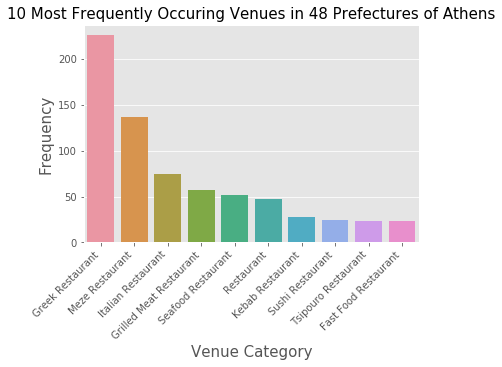

<Figure size 1296x504 with 0 Axes>

In [50]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=Athens_Prefecture_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 48 Prefectures of Athens', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [51]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Athens_Prefecture_only_restaurant.shape)
Athens_Prefecture_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (869, 7)


Municipality  Municipality Latitude  \
1          Agia Varvara (Αγία Βαρβάρα)              37.995370   
2          Agia Varvara (Αγία Βαρβάρα)              37.995370   
3          Agia Varvara (Αγία Βαρβάρα)              37.995370   
4          Agia Varvara (Αγία Βαρβάρα)              37.995370   
5          Agia Varvara (Αγία Βαρβάρα)              37.995370   
6          Agia Varvara (Αγία Βαρβάρα)              37.995370   
7          Agia Varvara (Αγία Βαρβάρα)              37.995370   
8          Agia Varvara (Αγία Βαρβάρα)              37.995370   
9          Agia Varvara (Αγία Βαρβάρα)              37.995370   
10         Agia Varvara (Αγία Βαρβάρα)              37.995370   
11         Agia Varvara (Αγία Βαρβάρα)              37.995370   
12         Agia Varvara (Αγία Βαρβάρα)              37.995370   
13         Agia Varvara (Αγία Βαρβάρα)              37.995370   
14         Agia Varvara (Αγία Βαρβάρα)              37.995370   
15         Agia Varvara (Αγία Βαρβάρα)              37.995370   
16         Agia Varvara (Αγία Βαρβάρα)              37.995370   
17         Agia Varvara (Αγία Βαρβάρα)              37.995370   
18         Agia Varvara (Αγία Βαρβάρα)              37.995370   
19         Agia Varvara (Αγία Βαρβάρα)              37.995370   
20         Agia Varvara (Αγία Βαρβάρα)              37.995370   
21         Agia Varvara (Αγία Βαρβάρα)              37.995370   
22     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
23     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
24     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
25     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
26     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
27     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
28     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
29     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
30     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
31     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
32     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
33     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
34     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
35     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
36     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
37     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
38     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
39     Agia Paraskevi (Αγία Παρασκευή)              38.013560   
40   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
41   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
42   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
43   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
44   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
45   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
46   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
47   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
48   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
49   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
50   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
51   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
52   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
53   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
54   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
55   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
56   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
57   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
58   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
59   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
60   Agioi Anargyroi (Άγιοι Ανάργυροι)              38.026480   
61   Agios Dimitrios (Άγιος Δημήτριος)              37.939780

In [52]:
Athens_Prefecture_restaurant = Athens_Prefecture_only_restaurant.groupby(['Municipality'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Athens_Prefecture_restaurant

Municipality
Agia Paraskevi (Αγία Παρασκευή)      18
Agia Varvara (Αγία Βαρβάρα)          21
Agioi Anargyroi (Άγιοι Ανάργυροι)    21
Agios Dimitrios (Άγιος Δημήτριος)    21
Aigaleo (Αιγάλεω)                    14
Alimos (Άλιμος)                      15
Argyroupoli (Αργυρούπολη)            14
Athens (Αθήνα)                       28
Chaidari (Χαϊδάρι)                   22
Chalandri (Χαλάνδρι)                 21
Cholargos (Χολαργός)                 20
Dafni (Δάφνη)                        21
Ekali (Εκάλη)                        20
Elliniko (Ελληνικό)                   6
Filothei (Φιλοθέη)                   10
Galatsi (Γαλάτσι)                    14
Glyfada (Γλυφάδα)                    28
Ilion (Ίλιον)                        22
Ilioupoli (Ηλιούπολη)                18
Irakleio (Ηράκλειο)                  17
Kaisariani (Καισαριανή)              20
Kallithea (Καλλιθέα)                 22
Kamatero (Καματερό)                   4
Kifisia (Κηφισιά)                    17
Lykovrysi (Λυκόβρυση)      

In [53]:
Athens_Prefecture_restaurant_df  = Athens_Prefecture_restaurant.to_frame().reset_index()
Athens_Prefecture_restaurant_df.columns = ['Municipality', 'Number of Restaurant']
Athens_Prefecture_restaurant_df.index = np.arange(1, len(Athens_Prefecture_restaurant)+1)
ath_pre_list_rest_no =Athens_Prefecture_restaurant_df['Number of Restaurant'].to_list()
ath_pre_list_dist =Athens_Prefecture_restaurant_df['Municipality'].to_list()
print (ath_pre_list_rest_no)
print (ath_pre_list_dist)

[18, 21, 21, 21, 14, 15, 14, 28, 22, 21, 20, 21, 20, 6, 10, 14, 28, 22, 18, 17, 20, 22, 4, 17, 15, 8, 19, 13, 25, 21, 18, 24, 14, 22, 21, 20, 22, 14, 15, 19, 20, 14, 16, 23, 13, 26, 18, 15]
['Agia Paraskevi (Αγία Παρασκευή)', 'Agia Varvara (Αγία Βαρβάρα)', 'Agioi Anargyroi (Άγιοι Ανάργυροι)', 'Agios Dimitrios (Άγιος Δημήτριος)', 'Aigaleo (Αιγάλεω)', 'Alimos (Άλιμος)', 'Argyroupoli (Αργυρούπολη)', 'Athens (Αθήνα)', 'Chaidari (Χαϊδάρι)', 'Chalandri (Χαλάνδρι)', 'Cholargos (Χολαργός)', 'Dafni (Δάφνη)', 'Ekali (Εκάλη)', 'Elliniko (Ελληνικό)', 'Filothei (Φιλοθέη)', 'Galatsi (Γαλάτσι)', 'Glyfada (Γλυφάδα)', 'Ilion (Ίλιον)', 'Ilioupoli (Ηλιούπολη)', 'Irakleio (Ηράκλειο)', 'Kaisariani (Καισαριανή)', 'Kallithea (Καλλιθέα)', 'Kamatero (Καματερό)', 'Kifisia (Κηφισιά)', 'Lykovrysi (Λυκόβρυση)', 'Marousi (Μαρούσι)', 'Melissia (Μελίσσια)', 'Metamorfosi (Μεταμόρφωση)', 'Moschato (Μοσχάτο)', 'Nea Chalkidona (Νέα Χαλκηδόνα)', 'Nea Erythraia (Νέα Ερυθραία)', 'Nea Filadelfeia (Νέα Φιλαδέλφεια)', 'Nea Ion

In [54]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Athens_Neighborhood_only_restaurant = athens_neigh_venues[athens_neigh_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Athens_Neighborhood_only_restaurant.index = np.arange(1, len(Athens_Neighborhood_only_restaurant )+1)

In [55]:
print (Athens_Neighborhood_only_restaurant['Venue Category'].value_counts())


Greek Restaurant                   178
Meze Restaurant                     80
Italian Restaurant                  42
Restaurant                          37
Mediterranean Restaurant            32
Indian Restaurant                   22
Seafood Restaurant                  18
Grilled Meat Restaurant             18
Falafel Restaurant                  17
Sushi Restaurant                    17
Vegetarian / Vegan Restaurant       14
Modern Greek Restaurant             13
Asian Restaurant                    13
Mexican Restaurant                  12
Comfort Food Restaurant             11
Fast Food Restaurant                11
French Restaurant                   10
Thai Restaurant                     10
Middle Eastern Restaurant            7
American Restaurant                  7
Cretan Restaurant                    7
Japanese Restaurant                  6
Kebab Restaurant                     5
Tsipouro Restaurant                  4
Tapas Restaurant                     4
Modern European Restauran

In [56]:
print('There are {} uniques categories.'.format(len(Athens_Neighborhood_only_restaurant['Venue Category'].unique())))


There are 35 uniques categories.


In [57]:
# create a dataframe of top 10 categories
Athens_Neighborhood_Venues_Top10 = Athens_Neighborhood_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Athens_Neighborhood_Venues_Top10=Athens_Neighborhood_Venues_Top10.reset_index()
#Athens_Prefecture_Venues_Top10

Athens_Neighborhood_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Athens_Neighborhood_Venues_Top10

Venue_Category  Frequency
0          Greek Restaurant        178
1           Meze Restaurant         80
2        Italian Restaurant         42
3                Restaurant         37
4  Mediterranean Restaurant         32
5         Indian Restaurant         22
6        Seafood Restaurant         18
7   Grilled Meat Restaurant         18
8        Falafel Restaurant         17
9          Sushi Restaurant         17

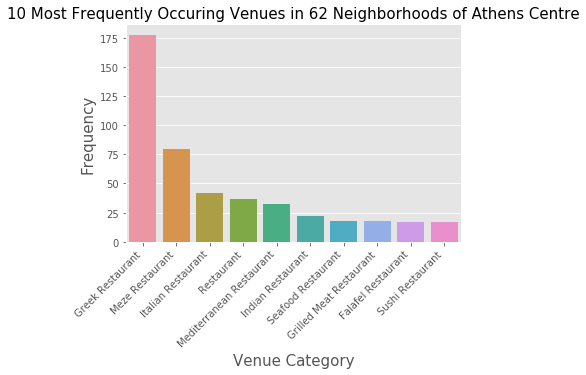

<Figure size 1296x504 with 0 Axes>

In [58]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=Athens_Neighborhood_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 62 Neighborhoods of Athens Centre', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [59]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Athens_Neighborhood_only_restaurant.shape)
Athens_Neighborhood_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (618, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1                Aerides              37.976140               23.736400   
2                Aerides              37.976140               23.736400   
3                Aerides              37.976140               23.736400   
4                Aerides              37.976140               23.736400   
5                Aerides              37.976140               23.736400   
6                Aerides              37.976140               23.736400   
7                Aerides              37.976140               23.736400   
8                Aerides              37.976140               23.736400   
9                Aerides              37.976140               23.736400   
10               Aerides              37.976140               23.736400   
11               Aerides              37.976140               23.736400   
12               Aerides              37.976140               23.736400   
13               Aerides              37.976140               23.736400   
14     Agios Eleftherios              38.019970               23.726270   
15     Agios Eleftherios              38.019970               23.726270   
16   Agios Panteleimonas              37.962660               23.625720   
17   Agios Panteleimonas              37.962660               23.625720   
18   Agios Panteleimonas              37.962660               23.625720   
19   Agios Panteleimonas              37.962660               23.625720   
20     Akadimia Platonos              37.990950               23.707180   
21              Akadimia              37.986750               23.711030   
22              Akadimia              37.986750               23.711030   
23              Akadimia              37.986750               23.711030   
24              Akadimia              37.986750               23.711030   
25              Akadimia              37.986750               23.711030   
26              Akadimia              37.986750               23.711030   
27           Ampelokipoi              37.991060               23.764290   
28           Ampelokipoi              37.991060               23.764290   
29           Ampelokipoi              37.991060               23.764290   
30           Ampelokipoi              37.991060               23.764290   
31           Ampelokipoi              37.991060               23.764290   
32           Ampelokipoi              37.991060               23.764290   
33           Ampelokipoi              37.991060               23.764290   
34           Ampelokipoi              37.991060               23.764290   
35           Ampelokipoi              37.991060               23.764290   
36           Ampelokipoi              37.991060               23.764290   
37            Anafiotika              37.972240               23.728520   
38            Anafiotika              37.972240               23.728520   
39            Anafiotika              37.972240               23.728520   
40            Anafiotika              37.972240               23.728520   
41            Anafiotika              37.972240               23.728520   
42            Anafiotika              37.972240               23.728520   
43            Anafiotika              37.972240               23.728520   
44            Anafiotika              37.972240               23.728520   
45            Anafiotika              37.972240               23.728520   
46            Anafiotika              37.972240               23.728520   
47            Anafiotika              37.972240               23.728520   
48            Anafiotika              37.972240               23.728520   
49         Ano Petralona              37.969480               23.708970   
50         Ano Petralona              37.969480               23.708970   
51         Ano Petralona              37.969480               23.708970   
52         Ano Petralona              37.969480               23.708970   
53         Ano Petralona             

In [60]:
Athen_Neighborhood_restaurant = Athens_Neighborhood_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Athen_Neighborhood_restaurant

Neighborhood
Aerides                13
Agios Eleftherios       2
Agios Panteleimonas     4
Akadimia                6
Akadimia Platonos       1
Ampelokipoi            10
Anafiotika             12
Ano Petralona          14
Asteroskopeio          27
Asyrmatos               2
Attiki                 13
Ellinoroson            12
Erythros Stavros        7
Evangelismos           24
Exarcheia              12
Gazi                    8
Goudi                   3
Gouva                   5
Ilisia                 15
Kallimarmaro           28
Kerameikos             29
Kolokynthou             2
Kolonaki               22
Kolonos                 1
Koukaki                10
Kountouriotika          9
Kynosargous             1
Kypriadou               3
Kypseli                10
Makrygianni            20
Metaxourgeio           19
Mets                    4
Monastiraki            13
Mount Lycabettus        9
Nea Filothei           11
Neapoli                12
Neos Kosmos            12
Omonoia                12

In [61]:
Athens_Neighborhood_restaurant_df  = Athen_Neighborhood_restaurant.to_frame().reset_index()
Athens_Neighborhood_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Athens_Neighborhood_restaurant_df.index = np.arange(1, len(Athen_Neighborhood_restaurant)+1)
ath_neig_list_rest_no =Athens_Neighborhood_restaurant_df['Number of Restaurant'].to_list()
ath_neig_list_dist =Athens_Neighborhood_restaurant_df['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)

## 3. Analyze Each Municipality and Each Neighborhood

In [62]:
# one hot encoding
athens_prefecture_onehot = pd.get_dummies(athens_pref_venues[['Venue Category']], prefix="", prefix_sep="")

# add municipality column back to dataframe
athens_prefecture_onehot['Municipality'] = athens_pref_venues['Municipality'] 

# move municipality column to the first column
fixed_columns = [athens_prefecture_onehot.columns[-1]] + list(athens_prefecture_onehot.columns[:-1])
athens_prefecture_onehot = athens_prefecture_onehot[fixed_columns]

athens_prefecture_onehot.head()

Municipality  African Restaurant  American Restaurant  \
0  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
1  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
2  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
3  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
4  Agia Varvara (Αγία Βαρβάρα)                   0                    0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0            0           0                    0                     0   
1            0           0                    0                     0   
2            0           0                    0                     0   
3            0           0                    0                     0   
4            0           0                    0                     0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Garage  \
0                 0                   0                0            0   
1                 0                   0                0            0   
2                 0                   0                0            0   
3                 0                   0                0            0   
4                 0                   0                0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  \
0              0          0           0           0       0    0   
1              0          0           0           0       0    0   
2              0          0           0           0       0    0   
3              0          0           0           0       0    0   
4              0          0           0           0       0    0   

   Baseball Field  Basketball Court  Basketball Stadium  Beach  Beach Bar  \
0               0                 0                   0      0          0   
1               0                 0                   0      0          0   
2               0                 0                   0      0          0   
3               0                 0                   0      0          0   
4               0                 0                   0      0          0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bistro  Boat or Ferry  \
0         0            0           0             0       0              0   
1         0            0           0             0       0              0   
2         0            0           0             0       0              0   
3         0            0           0             0       0              0   
4         0            0           0             0       0              0   

   Bookstore  Bougatsa Shop  Boutique  Bowling Alley  Boxing Gym  \
0          0              0         0              0           0   
1          0              0         0              0           0   
2          0              0         0              0           0   
3          0              0         0              0           0   
4          0              0         0              0           0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Burger Joint  \
0               0        0            0                0             0   
1               0        0            0                0             0   
2               0        0            0                0             0   
3               0        0            0                0             0   
4               0        0            0                0             0   

   Bus Stop  Butcher  Café  Camera Store  Campground  Canal  Candy Store  \
0         0        0     0             0           0      0            0   
1         0        0     0             0           0      0            0   
2         0        0     0             0           0      0            0   
3         0        0     1             0           0      0            0   
4         0        0     1             0           0      0            0   

   Carpet Store  Castle  Cheese Shop  Chine

In [63]:
athens_prefecture_onehot.shape

(4700, 255)

#### Next, let's group rows by municipality and by taking the mean of the frequency of occurrence of each category

In [64]:
athens_prefecture_grouped = athens_prefecture_onehot.groupby('Municipality').mean().reset_index()
athens_prefecture_grouped

Municipality  African Restaurant  \
0     Agia Paraskevi (Αγία Παρασκευή)                0.00   
1         Agia Varvara (Αγία Βαρβάρα)                0.00   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)                0.00   
3   Agios Dimitrios (Άγιος Δημήτριος)                0.00   
4                   Aigaleo (Αιγάλεω)                0.00   
5                     Alimos (Άλιμος)                0.00   
6           Argyroupoli (Αργυρούπολη)                0.00   
7                      Athens (Αθήνα)                0.00   
8                  Chaidari (Χαϊδάρι)                0.00   
9                Chalandri (Χαλάνδρι)                0.00   
10               Cholargos (Χολαργός)                0.00   
11                      Dafni (Δάφνη)                0.00   
12                      Ekali (Εκάλη)                0.00   
13                Elliniko (Ελληνικό)                0.00   
14                 Filothei (Φιλοθέη)                0.00   
15                  Galatsi (Γαλάτσι)                0.00   
16                  Glyfada (Γλυφάδα)                0.00   
17                      Ilion (Ίλιον)                0.00   
18              Ilioupoli (Ηλιούπολη)                0.00   
19                Irakleio (Ηράκλειο)                0.00   
20            Kaisariani (Καισαριανή)                0.00   
21               Kallithea (Καλλιθέα)                0.00   
22                Kamatero (Καματερό)                0.00   
23                  Kifisia (Κηφισιά)                0.00   
24              Lykovrysi (Λυκόβρυση)                0.00   
25                  Marousi (Μαρούσι)                0.00   
26                Melissia (Μελίσσια)                0.02   
27          Metamorfosi (Μεταμόρφωση)                0.00   
28                 Moschato (Μοσχάτο)                0.00   
29     Nea Chalkidona (Νέα Χαλκηδόνα)                0.00   
30       Nea Erythraia (Νέα Ερυθραία)                0.00   
31  Nea Filadelfeia (Νέα Φιλαδέλφεια)                0.00   
32              Nea Ionia (Νέα Ιωνία)                0.00   
33          Nea Penteli (Νέα Πεντέλη)                0.02   
34            Nea Smyrni (Νέα Σμύρνη)                0.00   
35          Neo Psychiko (Νέο Ψυχικό)                0.00   
36             Palaio Faliro (Φάληρο)                0.00   
37                  Papagou (Παπάγου)                0.00   
38                      Pefki (Πεύκη)                0.00   
39                  Penteli (Πεντέλη)                0.02   
40              Peristeri (Περιστέρι)                0.00   
41            Petroupoli (Πετρούπολη)                0.00   
42                  Psychiko (Ψυχικό)                0.00   
43                    Tavros (Ταύρος)                0.00   
44              Vrilissia (Βριλήσσια)                0.02   
45                  Vyronas (Βύρωνας)                0.00   
46                  Ymittos (Υμηττός)                0.00   
47                Zografou (Ζωγράφου)                0.00   

    American Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                  0.00         0.00        0.00                 0.00   
1                  0.00         0.00        0.00                 0.00   
2                  0.00         0.00        0.00                 0.02   
3                  0.01         0.00        0.00                 0.00   
4                  0.00         0.00        0.00                 0.00   
5                  0.00         0.00        0.00                 0.00   
6                  0.00         0.00        0.00                 0.00   
7                  0.00         0.02        0.01                 0.00   
8                  0.00         0.00        0.00                 0.00   
9                  0.00         0.00        0.00                 0.00   
10                 0.00         0.00        0.00                 0.00   
11                 0.00         0.00        0.00                 0.00   
12                 0.01         0.00        0.00                 0.00   
13           

In [65]:
athens_prefecture_grouped.shape

(48, 255)

In [66]:
# create a dataframe of top 10 categories
Athens_Dist_Venues_Top10 = athens_pref_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Athens_Dist_Venues_Top10=Athens_Dist_Venues_Top10.reset_index()
#Athens_Dist_Venues_Top10

Athens_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Athens_Dist_Venues_Top10

Venue_Category  Frequency
0              Café        449
1  Greek Restaurant        226
2      Dessert Shop        190
3               Bar        187
4       Coffee Shop        183
5            Bakery        168
6     Souvlaki Shop        138
7   Meze Restaurant        137
8       Supermarket        113
9               Gym        107

#### Let's print each municipality along with the top 5 most common venues

In [67]:
num_top_venues = 5

for hood in athens_prefecture_grouped['Municipality']:
    print("----"+hood+"----")
    temp = athens_prefecture_grouped[athens_prefecture_grouped['Municipality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agia Paraskevi (Αγία Παρασκευή)----
              venue  freq
0  Greek Restaurant  0.09
1              Café  0.06
2               Bar  0.05
3      Dessert Shop  0.05
4            Bakery  0.05


----Agia Varvara (Αγία Βαρβάρα)----
              venue  freq
0              Café  0.18
1      Dessert Shop  0.05
2       Coffee Shop  0.05
3  Greek Restaurant  0.05
4   Meze Restaurant  0.05


----Agioi Anargyroi (Άγιοι Ανάργυροι)----
              venue  freq
0              Café  0.12
1  Greek Restaurant  0.06
2               Bar  0.06
3   Meze Restaurant  0.05
4          Creperie  0.04


----Agios Dimitrios (Άγιος Δημήτριος)----
              venue  freq
0  Greek Restaurant  0.08
1            Bakery  0.07
2              Café  0.05
3               Gym  0.04
4       Snack Place  0.04


----Aigaleo (Αιγάλεω)----
             venue  freq
0             Café  0.12
1      Coffee Shop  0.07
2  Meze Restaurant  0.05
3   Clothing Store  0.04
4   Ice Cream Shop  0.04


----Alimos (Άλιμος)----
      

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each municipality.

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Municipality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
municipality_venues_sorted = pd.DataFrame(columns=columns)
municipality_venues_sorted['Municipality'] = athens_prefecture_grouped['Municipality']

for ind in np.arange(athens_prefecture_grouped.shape[0]):
    municipality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(athens_prefecture_grouped.iloc[ind, :], num_top_venues)

municipality_venues_sorted.head()

Municipality 1st Most Common Venue  \
0    Agia Paraskevi (Αγία Παρασκευή)      Greek Restaurant   
1        Agia Varvara (Αγία Βαρβάρα)                  Café   
2  Agioi Anargyroi (Άγιοι Ανάργυροι)                  Café   
3  Agios Dimitrios (Άγιος Δημήτριος)      Greek Restaurant   
4                  Aigaleo (Αιγάλεω)                  Café   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café           Coffee Shop                Bakery   
1           Coffee Shop          Dessert Shop      Greek Restaurant   
2      Greek Restaurant                   Bar       Meze Restaurant   
3                Bakery                  Café           Snack Place   
4           Coffee Shop       Meze Restaurant        Clothing Store   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0          Dessert Shop                   Bar  Grilled Meat Restaurant   
1       Meze Restaurant                   Bar           Ice Cream Shop   
2          Dessert Shop               Taverna                      Gym   
3        Ice Cream Shop          Dessert Shop                      Gym   
4                   Bar        Ice Cream Shop         Greek Restaurant   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                    Plaza            Restaurant            Dairy Store  
1  Grilled Meat Restaurant               Taverna   Gym / Fitness Center  
2                 Creperie           Supermarket            Coffee Shop  
3          Meze Restaurant         Souvlaki Shop            Supermarket  
4           Cosmetics Shop          Dessert Shop             Donut Shop

#### Again we do the same for the Neighborhoods of Central Athens

In [70]:
# one hot encoding
athens_neigh_onehot = pd.get_dummies(athens_neigh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
athens_neigh_onehot['Neighborhood'] = athens_neigh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [athens_neigh_onehot.columns[-1]] + list(athens_neigh_onehot.columns[:-1])
athens_neigh_onehot = athens_neigh_onehot[fixed_columns]

athens_neigh_onehot.head()

Yoga Studio  Accessories Store  American Restaurant  Art Gallery  \
0            0                  0                    0            0   
1            0                  0                    0            0   
2            0                  0                    0            0   
3            0                  0                    0            0   
4            0                  0                    0            0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  BBQ Joint  Bagel Shop  \
0                   0                0            0          0           0   
1                   0                0            0          0           0   
2                   0                0            0          0           0   
3                   0                0            0          0           0   
4                   0                0            0          0           0   

   Bakery  Bar  Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  \
0       0    0                 0                   0      0                0   
1       0    0                 0                   0      0                0   
2       0    0                 0                   0      0                0   
3       0    0                 0                   0      0                0   
4       0    0                 0                   0      0                0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bistro  Bookstore  \
0         0            0           0             0       0          0   
1         0            0           0             0       0          0   
2         0            0           0             0       0          0   
3         0            0           0             0       0          0   
4         0            0           0             0       0          0   

   Bougatsa Shop  Boutique  Breakfast Spot  Bubble Tea Shop  Buffet  \
0              0         1               0                0       0   
1              0         0               0                0       0   
2              0         0               0                0       0   
3              0         0               0                0       0   
4              0         0               0                0       0   

   Burger Joint  Burrito Place  Bus Station  Bus Stop  Business Service  \
0             0              0            0         0                 0   
1             0              0            0         0                 0   
2             0              0            0         0                 0   
3             0              0            0         0                 0   
4             0              0            0         0                 0   

   Cafeteria  Café  Camera Store  Candy Store  Cheese Shop  \
0          0     0             0            0            0   
1          0     0             0            0            0   
2          0     0             0            0            0   
3          0     0             0            0            0   
4          0     0             0            0            0   

   Chinese Restaurant  Chocolate Shop  Church  Clothing Store  Cocktail Bar  \
0                   0               0       0               0             0   
1                   0               0       0               0             0   
2                   0               0       0               0             0   
3                   0               0       0               0             0   
4                   0               0       0               0           

In [71]:
athens_neigh_onehot.shape

(3542, 233)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [72]:
athens_neigh_grouped = athens_neigh_onehot.groupby('Neighborhood').mean().reset_index()
athens_neigh_grouped

Neighborhood  Yoga Studio  Accessories Store  American Restaurant  \
0               Aerides     0.000000               0.01                 0.01   
1     Agios Eleftherios     0.000000               0.00                 0.00   
2   Agios Panteleimonas     0.000000               0.00                 0.00   
3              Akadimia     0.000000               0.00                 0.00   
4     Akadimia Platonos     0.000000               0.00                 0.00   
5           Ampelokipoi     0.000000               0.00                 0.00   
6            Anafiotika     0.010000               0.00                 0.00   
7         Ano Petralona     0.025000               0.00                 0.00   
8         Asteroskopeio     0.000000               0.00                 0.00   
9             Asyrmatos     0.000000               0.00                 0.00   
10               Attiki     0.000000               0.01                 0.01   
11             Elaionas     0.000000               0.00                 0.00   
12          Ellinoroson     0.015152               0.00                 0.00   
13     Erythros Stavros     0.000000               0.00                 0.00   
14         Evangelismos     0.000000               0.00                 0.00   
15            Exarcheia     0.000000               0.00                 0.00   
16                 Gazi     0.000000               0.00                 0.00   
17           Girokomeio     0.000000               0.00                 0.00   
18                Goudi     0.000000               0.00                 0.00   
19                Gouva     0.000000               0.00                 0.00   
20                 Gyzi     0.000000               0.00                 0.00   
21               Ilisia     0.000000               0.00                 0.00   
22         Kallimarmaro     0.000000               0.00                 0.00   
23           Kerameikos     0.000000               0.00                 0.00   
24          Kolokynthou     0.000000               0.00                 0.00   
25             Kolonaki     0.000000               0.00                 0.01   
26              Kolonos     0.000000               0.00                 0.00   
27              Koukaki     0.000000               0.00                 0.00   
28       Kountouriotika     0.000000               0.00                 0.00   
29          Kynosargous     0.000000               0.00                 0.00   
30            Kypriadou     0.000000               0.00                 0.00   
31              Kypseli     0.000000               0.00                 0.00   
32          Makrygianni     0.010000               0.00                 0.00   
33         Metaxourgeio     0.000000               0.00                 0.00   
34                 Mets     0.000000               0.00                 0.00   
35          Monastiraki     0.000000               0.00                 0.01   
36     Mount Lycabettus     0.000000               0.01                 0.01   
37         Nea Filothei     0.000000               0.00                 0.00   
38              Neapoli     0.000000               0.00                 0.00   
39          Neos Kosmos     0.000000               0.00                 0.00   
40              Omonoia     0.000000               0.00                 0.00   
41             Pangrati     0.000000               0.00                 0.00   
42              Patisia     0.000000               0.00                 0.00   
43     Pedion tou Areos     0.000000               0.00                 0.00   
44            Petralona     0.025000               0.00                 0.00   
45          Philopappou     0.000000               0.00                 0.00   
46                Plaka     0.000000               0.00                 0.00   
47             Polygono     0.000000               0.00                 0.00   
48             Probonas     0.000000               0.01                 0.01   
49      Pro

In [73]:
athens_neigh_grouped.shape

(61, 233)

In [74]:
# create a dataframe of top 10 categories
Central_Athens_Dist_Venues_Top10 = athens_neigh_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Central_Athens_Dist_Venues_Top10=Central_Athens_Dist_Venues_Top10.reset_index()
#Central_Athens_Dist_Venues_Top10

Central_Athens_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Central_Athens_Dist_Venues_Top10

Venue_Category  Frequency
0              Café        378
1               Bar        258
2  Greek Restaurant        178
3       Coffee Shop        142
4      Dessert Shop        115
5             Hotel        108
6      Cocktail Bar         95
7            Bakery         90
8             Plaza         84
9     Souvlaki Shop         80

#### Let's print each neighborhood along with the top 5 most common venues

In [75]:
num_top_venues = 5

for hood in athens_neigh_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = athens_neigh_grouped[athens_neigh_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aerides----
            venue  freq
0             Bar  0.10
1    Cocktail Bar  0.06
2            Café  0.05
3  Clothing Store  0.05
4     Coffee Shop  0.04


----Agios Eleftherios----
              venue  freq
0       Supermarket  0.13
1              Café  0.13
2  Greek Restaurant  0.09
3          Pharmacy  0.09
4      Dessert Shop  0.04


----Agios Panteleimonas----
          venue  freq
0          Café  0.23
1   Coffee Shop  0.14
2          Park  0.09
3  Dessert Shop  0.05
4        Bakery  0.05


----Akadimia----
                     venue  freq
0         Greek Restaurant  0.23
1                      Bar  0.23
2          Meze Restaurant  0.15
3              Coffee Shop  0.08
4  Modern Greek Restaurant  0.08


----Akadimia Platonos----
         venue  freq
0  Coffee Shop  0.28
1     Bus Stop  0.11
2  Supermarket  0.11
3         Café  0.11
4  Snack Place  0.11


----Ampelokipoi----
          venue  freq
0          Café  0.08
1  Dance Studio  0.07
2        Bakery  0.07
3           B

            venue  freq
0             Bar  0.10
1    Cocktail Bar  0.06
2            Café  0.05
3  Clothing Store  0.05
4     Coffee Shop  0.04


----Profitis Daniil----
              venue  freq
0               Bar  0.14
1  Greek Restaurant  0.11
2   Meze Restaurant  0.11
3           Theater  0.08
4        Restaurant  0.06


----Profitis Ilias----
            venue  freq
0            Café  0.14
1  Clothing Store  0.05
2    Gourmet Shop  0.04
3  Ice Cream Shop  0.04
4     Coffee Shop  0.04


----Psyri----
          venue  freq
0          Café  0.12
1           Bar  0.11
2  Dessert Shop  0.07
3  Cocktail Bar  0.05
4   Coffee Shop  0.03


----Rizoupoli----
                 venue  freq
0                 Café  0.16
1                  Bar  0.12
2      Meze Restaurant  0.09
3  Arts & Crafts Store  0.06
4         Soccer Field  0.06


----Rouf----
              venue  freq
0               Bar  0.11
1           Theater  0.10
2         Nightclub  0.08
3              Café  0.07
4  Greek Restauran

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = athens_neigh_grouped['Neighborhood']

for ind in np.arange(athens_neigh_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(athens_neigh_grouped.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0              Aerides                   Bar          Cocktail Bar   
1    Agios Eleftherios                  Café           Supermarket   
2  Agios Panteleimonas                  Café           Coffee Shop   
3             Akadimia      Greek Restaurant                   Bar   
4    Akadimia Platonos           Coffee Shop                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Café        Clothing Store                 Hotel   
1              Pharmacy      Greek Restaurant           Auto Garage   
2                  Park          Burger Joint            Hookah Bar   
3       Meze Restaurant          Dessert Shop           Coffee Shop   
4           Snack Place              Bus Stop           Supermarket   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Coffee Shop              Boutique                Bakery   
1         Toy / Game Store               Taverna                   Gym   
2                    Plaza              Creperie    Seafood Restaurant   
3  Modern Greek Restaurant           Snack Place        Clothing Store   
4           Hardware Store                  Park          Dessert Shop   

  9th Most Common Venue 10th Most Common Venue  
0                 Plaza           Dessert Shop  
1         Grocery Store       Basketball Court  
2           Snack Place           Gourmet Shop  
3           Event Space     Falafel Restaurant  
4      Greek Restaurant                Kafenio

### Repeat the process for the example with the Restaurants

In [77]:
# one hot encoding
Pref_rest_onehot = pd.get_dummies(Athens_Prefecture_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add municipality column back to dataframe
Pref_rest_onehot['Municipality'] = Athens_Prefecture_only_restaurant['Municipality'] 

# move municipality column to the first column
fixed_columns = [Pref_rest_onehot.columns[-1]] + list(Pref_rest_onehot.columns[:-1])
Pref_rest_onehot = Pref_rest_onehot[fixed_columns]

Pref_rest_onehot.head()

Municipality  African Restaurant  American Restaurant  \
1  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
2  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
3  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
4  Agia Varvara (Αγία Βαρβάρα)                   0                    0   
5  Agia Varvara (Αγία Βαρβάρα)                   0                    0   

   Asian Restaurant  Chinese Restaurant  Comfort Food Restaurant  \
1                 0                   0                        0   
2                 0                   0                        0   
3                 0                   0                        0   
4                 0                   0                        0   
5                 0                   0                        0   

   Cretan Restaurant  Czech Restaurant  Falafel Restaurant  \
1                  0                 0                   0   
2                  0                 0                   0   
3                  0                 0                   0   
4                  0                 0                   0   
5                  0                 0                   0   

   Fast Food Restaurant  French Restaurant  German Restaurant  \
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
5                     1                  0                  0   

   Greek Restaurant  Grilled Meat Restaurant  Indian Restaurant  \
1                 1                        0                  0   
2                 0                        1                  0   
3                 0                        0                  0   
4                 0                        0                  0   
5                 0                        0                  0   

   Italian Restaurant  Japanese Restaurant  Kebab Restaurant  \
1                   0                    0                 0   
2                   0                    0                 0   
3                   0                    0                 1   
4                   0                    0                 0   
5                   0                    0                 0   

   Kurdish Restaurant  Latin American Restaurant  Lebanese Restaurant  \
1                   0                          0                    0   
2                   0                          0                    0   
3                   0                          0                    0   
4                   0                          0                    0   
5                   0                          0                    0   

   Mediterranean Restaurant  Mexican Restaurant  Meze Restaurant  \
1                         0                   0                0   
2                         0                   0                0   
3                         0                   0                0   
4                         0                   0                1   
5                         0                   0                0   

   Middle Eastern Restaurant  Modern European Restaurant  \
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   
5                          0                           0   

   Modern Greek Restaurant  Molecular Gastronomy Restaurant  Restaurant  \
1                        0                                0           0   
2                        0                                0           0   
3                        0                                0           0   
4                        0                                0           0   
5                     

In [78]:
Pref_rest_onehot.shape

(869, 39)

In [79]:
Pref_rest_grouped = Pref_rest_onehot.groupby('Municipality').mean().reset_index()
Pref_rest_grouped

Municipality  African Restaurant  \
0     Agia Paraskevi (Αγία Παρασκευή)            0.000000   
1         Agia Varvara (Αγία Βαρβάρα)            0.000000   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)            0.000000   
3   Agios Dimitrios (Άγιος Δημήτριος)            0.000000   
4                   Aigaleo (Αιγάλεω)            0.000000   
5                     Alimos (Άλιμος)            0.000000   
6           Argyroupoli (Αργυρούπολη)            0.000000   
7                      Athens (Αθήνα)            0.000000   
8                  Chaidari (Χαϊδάρι)            0.000000   
9                Chalandri (Χαλάνδρι)            0.000000   
10               Cholargos (Χολαργός)            0.000000   
11                      Dafni (Δάφνη)            0.000000   
12                      Ekali (Εκάλη)            0.000000   
13                Elliniko (Ελληνικό)            0.000000   
14                 Filothei (Φιλοθέη)            0.000000   
15                  Galatsi (Γαλάτσι)            0.000000   
16                  Glyfada (Γλυφάδα)            0.000000   
17                      Ilion (Ίλιον)            0.000000   
18              Ilioupoli (Ηλιούπολη)            0.000000   
19                Irakleio (Ηράκλειο)            0.000000   
20            Kaisariani (Καισαριανή)            0.000000   
21               Kallithea (Καλλιθέα)            0.000000   
22                Kamatero (Καματερό)            0.000000   
23                  Kifisia (Κηφισιά)            0.000000   
24              Lykovrysi (Λυκόβρυση)            0.000000   
25                  Marousi (Μαρούσι)            0.000000   
26                Melissia (Μελίσσια)            0.105263   
27          Metamorfosi (Μεταμόρφωση)            0.000000   
28                 Moschato (Μοσχάτο)            0.000000   
29     Nea Chalkidona (Νέα Χαλκηδόνα)            0.000000   
30       Nea Erythraia (Νέα Ερυθραία)            0.000000   
31  Nea Filadelfeia (Νέα Φιλαδέλφεια)            0.000000   
32              Nea Ionia (Νέα Ιωνία)            0.000000   
33          Nea Penteli (Νέα Πεντέλη)            0.090909   
34            Nea Smyrni (Νέα Σμύρνη)            0.000000   
35          Neo Psychiko (Νέο Ψυχικό)            0.000000   
36             Palaio Faliro (Φάληρο)            0.000000   
37                  Papagou (Παπάγου)            0.000000   
38                      Pefki (Πεύκη)            0.000000   
39                  Penteli (Πεντέλη)            0.105263   
40              Peristeri (Περιστέρι)            0.000000   
41            Petroupoli (Πετρούπολη)            0.000000   
42                  Psychiko (Ψυχικό)            0.000000   
43                    Tavros (Ταύρος)            0.000000   
44              Vrilissia (Βριλήσσια)            0.153846   
45                  Vyronas (Βύρωνας)            0.000000   
46                  Ymittos (Υμηττός)            0.000000   
47                Zografou (Ζωγράφου)            0.000000   

    American Restaurant  Asian Restaurant  Chinese Restaurant  \
0              0.000000          0.000000            0.000000   
1              0.000000          0.000000            0.047619   
2              0.000000          0.000000            0.000000   
3              0.047619          0.000000            0.000000   
4              0.000000          0.000000            0.000000   
5              0.000000          0.066667            0.000000   
6              0.000000          0.000000            0.000000   
7              0.000000          0.000000            0.000000   
8              0.000000          0.000000            0.045455   
9              0.000000          0.000000            0.000000   
10             0.000000          0.000000            0.000000   
11             0.000000          0.000000            0.000000   
12             0.050000          0.000000            0.050000   
13             0.000000          0.000000            0.000000   
14             0.000000          0.000000            0.10000

In [80]:
Pref_rest_grouped.shape

(48, 39)

In [81]:
num_top_venues = 5

for hood in Pref_rest_grouped['Municipality']:
    print("----"+hood+"----")
    temp = Pref_rest_grouped[Pref_rest_grouped['Municipality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agia Paraskevi (Αγία Παρασκευή)----
                     venue  freq
0         Greek Restaurant  0.50
1               Restaurant  0.17
2  Grilled Meat Restaurant  0.17
3      Lebanese Restaurant  0.06
4        Cretan Restaurant  0.06


----Agia Varvara (Αγία Βαρβάρα)----
                     venue  freq
0         Greek Restaurant  0.24
1          Meze Restaurant  0.24
2  Grilled Meat Restaurant  0.19
3       Italian Restaurant  0.10
4       Chinese Restaurant  0.05


----Agioi Anargyroi (Άγιοι Ανάργυροι)----
                  venue  freq
0      Greek Restaurant  0.29
1       Meze Restaurant  0.24
2  Fast Food Restaurant  0.14
3    Seafood Restaurant  0.05
4      Kebab Restaurant  0.05


----Agios Dimitrios (Άγιος Δημήτριος)----
                     venue  freq
0         Greek Restaurant  0.38
1          Meze Restaurant  0.14
2  Grilled Meat Restaurant  0.10
3         Sushi Restaurant  0.10
4       Mexican Restaurant  0.05


----Aigaleo (Αιγάλεω)----
                     venue  freq

                     venue  freq
0         Greek Restaurant  0.21
1  Grilled Meat Restaurant  0.14
2     Fast Food Restaurant  0.07
3       Mexican Restaurant  0.07
4      American Restaurant  0.07


----Pefki (Πεύκη)----
                     venue  freq
0       Seafood Restaurant  0.20
1         Greek Restaurant  0.20
2          Meze Restaurant  0.13
3               Restaurant  0.13
4  Grilled Meat Restaurant  0.13


----Penteli (Πεντέλη)----
                     venue  freq
0          Meze Restaurant  0.16
1       African Restaurant  0.11
2       Seafood Restaurant  0.11
3      Tsipouro Restaurant  0.11
4  Grilled Meat Restaurant  0.11


----Peristeri (Περιστέρι)----
                       venue  freq
0           Greek Restaurant  0.25
1         Italian Restaurant  0.15
2        Tsipouro Restaurant  0.15
3  Middle Eastern Restaurant  0.05
4  Latin American Restaurant  0.05


----Petroupoli (Πετρούπολη)----
                     venue  freq
0         Greek Restaurant  0.50
1  Grilled M

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Municipality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
prefecture_restaurant_sorted = pd.DataFrame(columns=columns)
prefecture_restaurant_sorted['Municipality'] = Pref_rest_grouped['Municipality']

for ind in np.arange(Pref_rest_grouped.shape[0]):
    prefecture_restaurant_sorted.iloc[ind, 1:] = return_most_common_venues(Pref_rest_grouped.iloc[ind, :], num_top_venues)

prefecture_restaurant_sorted.head()

Municipality 1st Most Common Venue  \
0    Agia Paraskevi (Αγία Παρασκευή)      Greek Restaurant   
1        Agia Varvara (Αγία Βαρβάρα)       Meze Restaurant   
2  Agioi Anargyroi (Άγιοι Ανάργυροι)      Greek Restaurant   
3  Agios Dimitrios (Άγιος Δημήτριος)      Greek Restaurant   
4                  Aigaleo (Αιγάλεω)       Meze Restaurant   

  2nd Most Common Venue    3rd Most Common Venue 4th Most Common Venue  \
0            Restaurant  Grilled Meat Restaurant   Lebanese Restaurant   
1      Greek Restaurant  Grilled Meat Restaurant    Italian Restaurant   
2       Meze Restaurant     Fast Food Restaurant      Kebab Restaurant   
3       Meze Restaurant  Grilled Meat Restaurant      Sushi Restaurant   
4      Greek Restaurant       Italian Restaurant  Fast Food Restaurant   

       5th Most Common Venue    6th Most Common Venue  \
0           Sushi Restaurant        Cretan Restaurant   
1                 Restaurant      Tsipouro Restaurant   
2  Middle Eastern Restaurant       Turkish Restaurant   
3      Vietnamese Restaurant               Restaurant   
4    Scandinavian Restaurant  Grilled Meat Restaurant   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Fast Food Restaurant    Italian Restaurant     Indian Restaurant   
1       Chinese Restaurant      Kebab Restaurant  Fast Food Restaurant   
2  Grilled Meat Restaurant    Seafood Restaurant     Cretan Restaurant   
3       Mexican Restaurant      Kebab Restaurant       Thai Restaurant   
4         Kebab Restaurant      Czech Restaurant     Cretan Restaurant   

  10th Most Common Venue  
0      German Restaurant  
1      French Restaurant  
2             Restaurant  
3    American Restaurant  
4     Falafel Restaurant

In [83]:
# one hot encoding
Centre_rest_onehot = pd.get_dummies(Athens_Neighborhood_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Centre_rest_onehot['Neighborhood'] = Athens_Neighborhood_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Centre_rest_onehot.columns[-1]] + list(Centre_rest_onehot.columns[:-1])
Centre_rest_onehot = Centre_rest_onehot[fixed_columns]

Centre_rest_onehot.head()

Neighborhood  American Restaurant  Asian Restaurant  Chinese Restaurant  \
1      Aerides                    0                 0                   0   
2      Aerides                    0                 0                   0   
3      Aerides                    0                 0                   0   
4      Aerides                    0                 0                   0   
5      Aerides                    0                 0                   0   

   Comfort Food Restaurant  Cretan Restaurant  Czech Restaurant  \
1                        0                  0                 0   
2                        0                  0                 0   
3                        0                  0                 0   
4                        0                  0                 0   
5                        0                  0                 0   

   Eastern European Restaurant  Falafel Restaurant  Fast Food Restaurant  \
1                            0                   0                     0   
2                            0                   0                     0   
3                            0                   0                     0   
4                            0                   0                     0   
5                            0                   0                     0   

   French Restaurant  Greek Restaurant  Grilled Meat Restaurant  \
1                  1                 0                        0   
2                  0                 0                        0   
3                  0                 0                        0   
4                  0                 0                        0   
5                  0                 0                        0   

   Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
1                  0                   0                    0   
2                  1                   0                    0   
3                  0                   1                    0   
4                  0                   0                    0   
5                  0                   1                    0   

   Kebab Restaurant  Mediterranean Restaurant  Mexican Restaurant  \
1                 0                         0                   0   
2                 0                         0                   0   
3                 0                         0                   0   
4                 0                         0                   0   
5                 0                         0                   0   

   Meze Restaurant  Middle Eastern Restaurant  Modern European Restaurant  \
1                0                          0                           0   
2                0                          0                           0   
3                0                          0                           0   
4                0                          0                           0   
5                0                          0                           0   

   Modern Greek Restaurant  Molecular Gastronomy Restaurant  \
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   
5                        0                                0   

   New American Restaurant  Paella Restaurant  Peruvian Restaurant  \
1                        0                  0                    0   
2                        0                  0                    0   
3                        0                  0                    0   
4                        0                  0                    0   
5                        0                  0                    0   

   Restaurant  Seafood Restaurant  South American Restaurant  \
1           0                   0                          0   
2           0                   0                          0   
3           0  

In [84]:
Centre_rest_onehot.shape

(618, 36)

In [85]:
Centre_rest_grouped = Centre_rest_onehot.groupby('Neighborhood').mean().reset_index()
Centre_rest_grouped

Neighborhood  American Restaurant  Asian Restaurant  \
0               Aerides             0.076923          0.000000   
1     Agios Eleftherios             0.000000          0.000000   
2   Agios Panteleimonas             0.000000          0.000000   
3              Akadimia             0.000000          0.000000   
4     Akadimia Platonos             0.000000          0.000000   
5           Ampelokipoi             0.000000          0.200000   
6            Anafiotika             0.000000          0.000000   
7         Ano Petralona             0.000000          0.000000   
8         Asteroskopeio             0.000000          0.000000   
9             Asyrmatos             0.000000          0.000000   
10               Attiki             0.076923          0.000000   
11          Ellinoroson             0.000000          0.000000   
12     Erythros Stavros             0.000000          0.142857   
13         Evangelismos             0.000000          0.000000   
14            Exarcheia             0.000000          0.000000   
15                 Gazi             0.000000          0.000000   
16                Goudi             0.000000          0.000000   
17                Gouva             0.000000          0.000000   
18               Ilisia             0.000000          0.000000   
19         Kallimarmaro             0.000000          0.000000   
20           Kerameikos             0.000000          0.034483   
21          Kolokynthou             0.000000          0.000000   
22             Kolonaki             0.045455          0.000000   
23              Kolonos             0.000000          0.000000   
24              Koukaki             0.000000          0.000000   
25       Kountouriotika             0.000000          0.000000   
26          Kynosargous             0.000000          0.000000   
27            Kypriadou             0.000000          0.000000   
28              Kypseli             0.000000          0.000000   
29          Makrygianni             0.000000          0.000000   
30         Metaxourgeio             0.000000          0.052632   
31                 Mets             0.000000          0.000000   
32          Monastiraki             0.076923          0.076923   
33     Mount Lycabettus             0.111111          0.000000   
34         Nea Filothei             0.000000          0.181818   
35              Neapoli             0.000000          0.000000   
36          Neos Kosmos             0.000000          0.000000   
37              Omonoia             0.000000          0.000000   
38             Pangrati             0.000000          0.000000   
39              Patisia             0.000000          0.000000   
40     Pedion tou Areos             0.000000          0.000000   
41            Petralona             0.000000          0.000000   
42          Philopappou             0.000000          0.000000   
43                Plaka             0.000000          0.071429   
44             Polygono             0.000000          0.000000   
45             Probonas             0.076923          0.000000   
46      Profitis Daniil             0.000000          0.066667   
47       Profitis Ilias             0.000000          0.090909   
48                Psyri             0.000000          0.058824   
49            Rizoupoli             0.000000          0.000000   
50                 Rouf             0.000000          0.000000   
51              Sepolia             0.000000          0.000000   
52          Skouze Hill             0.000000          0.090909   
53              Thiseio             0.000000          0.000000   
54           Thymarakia             0.000000          0.000000   
55        Treis Gefyres             0.076923          0.000000   
56                Vathi             0.000000          0.000000   

    Chinese Restaurant  Comfort Food Restaurant  Cretan Restaurant  \
0             0.000000                 0.076923           0.000000   
1             0.000000                 0.0

In [86]:
Centre_rest_grouped.shape

(57, 36)

In [87]:
num_top_venues = 5

for hood in Centre_rest_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Centre_rest_grouped[Centre_rest_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aerides----
                 venue  freq
0     Sushi Restaurant  0.15
1   Italian Restaurant  0.15
2  American Restaurant  0.08
3    French Restaurant  0.08
4           Restaurant  0.08


----Agios Eleftherios----
                        venue  freq
0            Greek Restaurant   1.0
1         American Restaurant   0.0
2             Meze Restaurant   0.0
3  Modern European Restaurant   0.0
4     Modern Greek Restaurant   0.0


----Agios Panteleimonas----
                     venue  freq
0         Greek Restaurant  0.25
1         Kebab Restaurant  0.25
2       Seafood Restaurant  0.25
3  Grilled Meat Restaurant  0.25
4      American Restaurant  0.00


----Akadimia----
                        venue  freq
0            Greek Restaurant  0.50
1             Meze Restaurant  0.33
2     Modern Greek Restaurant  0.17
3         American Restaurant  0.00
4  Modern European Restaurant  0.00


----Akadimia Platonos----
                        venue  freq
0            Greek Restaurant   1.0
1  

4  Mediterranean Restaurant  0.07


----Profitis Ilias----
                venue  freq
0  Mexican Restaurant  0.18
1    Sushi Restaurant  0.18
2          Restaurant  0.18
3     Thai Restaurant  0.09
4  Seafood Restaurant  0.09


----Psyri----
                  venue  freq
0      Greek Restaurant  0.18
1       Meze Restaurant  0.12
2    Falafel Restaurant  0.12
3  Fast Food Restaurant  0.12
4     Indian Restaurant  0.12


----Rizoupoli----
                        venue  freq
0             Meze Restaurant  0.50
1          Mexican Restaurant  0.17
2            Greek Restaurant  0.17
3          Turkish Restaurant  0.17
4  Modern European Restaurant  0.00


----Rouf----
                      venue  freq
0          Greek Restaurant  0.44
1                Restaurant  0.22
2  Mediterranean Restaurant  0.11
3           Thai Restaurant  0.11
4        Italian Restaurant  0.11


----Sepolia----
                        venue  freq
0            Greek Restaurant   0.6
1   Middle Eastern Restaurant   

In [88]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_restaurant_sorted = pd.DataFrame(columns=columns)
neighborhood_restaurant_sorted['Neighborhood'] = Centre_rest_grouped['Neighborhood']

for ind in np.arange(Centre_rest_grouped.shape[0]):
    neighborhood_restaurant_sorted.iloc[ind, 1:] = return_most_common_venues(Centre_rest_grouped.iloc[ind, :], num_top_venues)

neighborhood_restaurant_sorted.head()

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0              Aerides      Sushi Restaurant             Italian Restaurant   
1    Agios Eleftherios      Greek Restaurant  Vegetarian / Vegan Restaurant   
2  Agios Panteleimonas      Kebab Restaurant        Grilled Meat Restaurant   
3             Akadimia      Greek Restaurant                Meze Restaurant   
4    Akadimia Platonos      Greek Restaurant  Vegetarian / Vegan Restaurant   

           3rd Most Common Venue          4th Most Common Venue  \
0  Vegetarian / Vegan Restaurant            Japanese Restaurant   
1           Fast Food Restaurant            Japanese Restaurant   
2               Greek Restaurant             Seafood Restaurant   
3        Modern Greek Restaurant  Vegetarian / Vegan Restaurant   
4           Fast Food Restaurant            Japanese Restaurant   

     5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0  Comfort Food Restaurant     French Restaurant         Greek Restaurant   
1       Italian Restaurant     Indian Restaurant  Grilled Meat Restaurant   
2     Fast Food Restaurant   Japanese Restaurant       Italian Restaurant   
3         Kebab Restaurant    Italian Restaurant        Indian Restaurant   
4       Italian Restaurant     Indian Restaurant  Grilled Meat Restaurant   

     8th Most Common Venue 9th Most Common Venue  \
0        Indian Restaurant    Mexican Restaurant   
1        French Restaurant    Falafel Restaurant   
2        Indian Restaurant     French Restaurant   
3  Grilled Meat Restaurant     French Restaurant   
4        French Restaurant    Falafel Restaurant   

          10th Most Common Venue  
0            American Restaurant  
1       Mediterranean Restaurant  
2  Vegetarian / Vegan Restaurant  
3           Fast Food Restaurant  
4       Mediterranean Restaurant

## 4. Cluster Municipalities and Neighborhoods

Run *k*-means to cluster the municipalities and neighborhoods into 5 clusters.

In [89]:
# set number of clusters
kclusters = 5

athens_pref_grouped_clustering = athens_prefecture_grouped.drop('Municipality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(athens_pref_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 3, 4, 1, 2, 4, 4, 1, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each municipality.

In [90]:
# add clustering labels

municipality_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [91]:
athens_pref_merged = ath_pref

# merge athens_prefecture_grouped with ath_pref to add latitude/longitude for each municipality
athens_pref_merged = athens_pref_merged.join(municipality_venues_sorted.set_index('Municipality'), on='Municipality')

athens_pref_merged.head() # check the last columns!

Municipality                               Seat  \
0        Agia Varvara (Αγία Βαρβάρα)        Agia Varvara (Αγία Βαρβάρα)   
1    Agia Paraskevi (Αγία Παρασκευή)    Agia Paraskevi (Αγία Παρασκευή)   
2  Agioi Anargyroi (Άγιοι Ανάργυροι)  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3  Agios Dimitrios (Άγιος Δημήτριος)                 Brahami (Μπραχάμι)   
4                  Aigaleo (Αιγάλεω)                  Aigaleo (Αιγάλεω)   

   Population  Area (km2)  Density (/km2)  Latitude  Longitude  \
0       30562       2.425           12603  37.99537   23.66186   
1       59500       7.967            7498  38.01356   23.82175   
2       32957       3.200           10299  38.02648   23.71788   
3       65173       4.949           13169  37.93978   23.73147   
4       74046       6.450           11480  37.99274   23.68043   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               1                  Café           Coffee Shop   
1               4      Greek Restaurant                  Café   
2               3                  Café      Greek Restaurant   
3               4      Greek Restaurant                Bakery   
4               1                  Café           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0          Dessert Shop      Greek Restaurant       Meze Restaurant   
1           Coffee Shop                Bakery          Dessert Shop   
2                   Bar       Meze Restaurant          Dessert Shop   
3                  Café           Snack Place        Ice Cream Shop   
4       Meze Restaurant        Clothing Store                   Bar   

  6th Most Common Venue    7th Most Common Venue    8th Most Common Venue  \
0                   Bar           Ice Cream Shop  Grilled Meat Restaurant   
1                   Bar  Grilled Meat Restaurant                    Plaza   
2               Taverna                      Gym                 Creperie   
3          Dessert Shop                      Gym          Meze Restaurant   
4        Ice Cream Shop         Greek Restaurant           Cosmetics Shop   

  9th Most Common Venue 10th Most Common Venue  
0               Taverna   Gym / Fitness Center  
1            Restaurant            Dairy Store  
2           Supermarket            Coffee Shop  
3         Souvlaki Shop            Supermarket  
4          Dessert Shop             Donut Shop

In [92]:
athens_pref_merged

Municipality                               Seat  \
0         Agia Varvara (Αγία Βαρβάρα)        Agia Varvara (Αγία Βαρβάρα)   
1     Agia Paraskevi (Αγία Παρασκευή)    Agia Paraskevi (Αγία Παρασκευή)   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3   Agios Dimitrios (Άγιος Δημήτριος)                 Brahami (Μπραχάμι)   
4                   Aigaleo (Αιγάλεω)                  Aigaleo (Αιγάλεω)   
5                     Alimos (Άλιμος)                Kalamaki (Καλαμάκι)   
6                   Marousi (Μαρούσι)                  Marousi (Μαρούσι)   
7           Argyroupoli (Αργυρούπολη)          Argyroupoli (Αργυρούπολη)   
8                      Athens (Αθήνα)                     Athens (Αθήνα)   
9                  Chaidari (Χαϊδάρι)                 Chaidari (Χαϊδάρι)   
10               Chalandri (Χαλάνδρι)               Chalandri (Χαλάνδρι)   
11               Cholargos (Χολαργός)               Cholargos (Χολαργός)   
12                      Dafni (Δάφνη)                      Dafni (Δάφνη)   
13                      Ekali (Εκάλη)                      Ekali (Εκάλη)   
14                Elliniko (Ελληνικό)                Elliniko (Ελληνικό)   
15                 Filothei (Φιλοθέη)                 Filothei (Φιλοθέη)   
16                  Galatsi (Γαλάτσι)                  Galatsi (Γαλάτσι)   
17                  Glyfada (Γλυφάδα)                  Glyfada (Γλυφάδα)   
18                      Ilion (Ίλιον)            Nea Liosia (Νέα Λιόσια)   
19              Ilioupoli (Ηλιούπολη)              Ilioupoli (Ηλιούπολη)   
20                Irakleio (Ηράκλειο)        Neo Irakleio (Νέο Ηράκλειο)   
21            Kaisariani (Καισαριανή)            Kaisariani (Καισαριανή)   
22               Kallithea (Καλλιθέα)               Kallithea (Καλλιθέα)   
23                Kamatero (Καματερό)                Kamatero (Καματερό)   
24                  Kifisia (Κηφισιά)                  Kifisia (Κηφισιά)   
25              Lykovrysi (Λυκόβρυση)              Lykovrysi (Λυκόβρυση)   
26                Melissia (Μελίσσια)                Melissia (Μελίσσια)   
27          Metamorfosi (Μεταμόρφωση)      Koukouvaounes (Κουκουβάουνες)   
28                 Moschato (Μοσχάτο)                 Moschato (Μοσχάτο)   
29     Nea Chalkidona (Νέα Χαλκηδόνα)     Nea Chalkidona (Νέα Χαλκηδόνα)   
30       Nea Erythraia (Νέα Ερυθραία)       Nea Erythraia (Νέα Ερυθραία)   
31              Nea Ionia (Νέα Ιωνία)              Nea Ionia (Νέα Ιωνία)   
32  Nea Filadelfeia (Νέα Φιλαδέλφεια)  Nea Filadelfeia (Νέα Φιλαδέλφεια)   
33            Nea Smyrni (Νέα Σμύρνη)            Nea Smyrni (Νέα Σμύρνη)   
34          Nea Penteli (Νέα Πεντέλη)          Nea Penteli (Νέα Πεντέλη)   
35          Neo Psychiko (Νέο Ψυχικό)          Neo Psychiko (Νέο Ψυχικό)   
36             Palaio Faliro (Φάληρο)      Palaio Faliro (Παλαιό Φάληρο)   
37                  Papagou (Παπάγου)                  Papagou (Παπάγου)   
38                      Pefki (Πεύκη)                      Pefki (Πέυκη)   
39                  Penteli (Πεντέλη)                  Penteli (Πεντέλη)   
40              Peristeri (Περιστέρι)              Peristeri (Περιστέρι)   
41            Petroupoli (Πετρούπολη)            Petroupoli (Πετρούπολη)   
42                  Psychiko (Ψυχικό)    Palaio Psychiko (Παλαιό Ψυχικό)   
43                    Tavros (Ταύρος)                    Tavros (Ταύρος)   
44              Vrilissia (Βριλήσσια)                 Analipsi (Ανάληψη)   
45                  Vyronas (Βύρωνας)                  Vironas (Βύρωνας)   
46                  Ymittos (Υμηττός)                  Ymittos (Υμηττός)   
47                Zografou (Ζωγράφου)                Zografou (Ζωγράφου)   

    Population  Area (km2)  Density (/km2)   Latitude  Longitude  \
0        30562       2.425           12603  37.995370  23.661860   
1        59500       7.967            7498  38.013560  23.821750   
2        32957       3.200           10299  38.026480  23.717880   
3        65173       4.949  

In [93]:
municipality_venues_sorted

Cluster Labels                       Municipality 1st Most Common Venue  \
0                4    Agia Paraskevi (Αγία Παρασκευή)      Greek Restaurant   
1                1        Agia Varvara (Αγία Βαρβάρα)                  Café   
2                3  Agioi Anargyroi (Άγιοι Ανάργυροι)                  Café   
3                4  Agios Dimitrios (Άγιος Δημήτριος)      Greek Restaurant   
4                1                  Aigaleo (Αιγάλεω)                  Café   
5                2                    Alimos (Άλιμος)                 Beach   
6                4          Argyroupoli (Αργυρούπολη)                  Café   
7                4                     Athens (Αθήνα)                   Bar   
8                1                 Chaidari (Χαϊδάρι)                  Café   
9                2               Chalandri (Χαλάνδρι)                  Café   
10               2               Cholargos (Χολαργός)                  Café   
11               3                      Dafni (Δάφνη)      Greek Restaurant   
12               2                      Ekali (Εκάλη)                Bakery   
13               0                Elliniko (Ελληνικό)             Nightclub   
14               3                 Filothei (Φιλοθέη)                  Café   
15               2                  Galatsi (Γαλάτσι)                  Café   
16               2                  Glyfada (Γλυφάδα)    Italian Restaurant   
17               3                      Ilion (Ίλιον)                  Café   
18               4              Ilioupoli (Ηλιούπολη)      Greek Restaurant   
19               2                Irakleio (Ηράκλειο)                  Café   
20               1            Kaisariani (Καισαριανή)                  Café   
21               1               Kallithea (Καλλιθέα)                  Café   
22               3                Kamatero (Καματερό)           Supermarket   
23               2                  Kifisia (Κηφισιά)                  Café   
24               4              Lykovrysi (Λυκόβρυση)                Bakery   
25               2                  Marousi (Μαρούσι)                  Café   
26               2                Melissia (Μελίσσια)                  Café   
27               3          Metamorfosi (Μεταμόρφωση)                  Café   
28               4                 Moschato (Μοσχάτο)      Greek Restaurant   
29               4     Nea Chalkidona (Νέα Χαλκηδόνα)                  Café   
30               2       Nea Erythraia (Νέα Ερυθραία)                Bakery   
31               4  Nea Filadelfeia (Νέα Φιλαδέλφεια)                  Café   
32               3              Nea Ionia (Νέα Ιωνία)                  Café   
33               2          Nea Penteli (Νέα Πεντέλη)                Bakery   
34               1            Nea Smyrni (Νέα Σμύρνη)                  Café   
35               2          Neo Psychiko (Νέο Ψυχικό)          Dessert Shop   
36               0             Palaio Faliro (Φάληρο)      Greek Restaurant   
37               1                  Papagou (Παπάγου)                  Café   
38               2                      Pefki (Πεύκη)                  Café   
39               2                  Penteli (Πεντέλη)                  Café   
40               1              Peristeri (Περιστέρι)                  Café   
41               3            Petroupoli (Πετρούπολη)                  Café   
42               2                  Psychiko (Ψυχικό)                 Plaza   
43               1                    Tavros (Ταύρος)                  Café   
44               2              Vrilissia (Βριλήσσια)                   Gym   
45               4                  Vyronas (Βύρωνας)      Greek Restaurant   
46               1                  Ymittos (Υμηττός)                  Café   
47               1                Zografou (Ζωγράφου)                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                   Café           Coffee Shop              

Let's visualize the resulting clusters

In [94]:
# create map
m_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(athens_pref_merged['Latitude'], athens_pref_merged['Longitude'], athens_pref_merged['Municipality'], athens_pref_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(m_map_clusters)
       
m_map_clusters

#### Doing the same for the neighborhoods in Central Athens

In [95]:
kclusters = 5

athens_neigh_grouped_clustering = athens_neigh_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(athens_neigh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 1, 1, 1, 2, 2, 1])

In [96]:
# add clustering labels

neighborhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [97]:
athens_neigh_merged = ath_neigh

# merge athens_neigh_grouped with ath_neigh to add latitude/longitude for each neighborhood
athens_neigh_merged = athens_neigh_merged.join(neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

athens_neigh_merged.head() # check the last columns!

Neighborhood  Latitude  Longitude  Cluster Labels  \
0              Aerides  37.97614   23.73640               1   
1    Agios Eleftherios  38.01997   23.72627               1   
2  Agios Panteleimonas  37.96266   23.62572               1   
3    Akadimia Platonos  37.99095   23.70718               1   
4             Akadimia  37.98675   23.71103               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar          Cocktail Bar                  Café   
1                  Café           Supermarket              Pharmacy   
2                  Café           Coffee Shop                  Park   
3           Coffee Shop                  Café           Snack Place   
4      Greek Restaurant                   Bar       Meze Restaurant   

  4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
0        Clothing Store                 Hotel              Coffee Shop   
1      Greek Restaurant           Auto Garage         Toy / Game Store   
2          Burger Joint            Hookah Bar                    Plaza   
3              Bus Stop           Supermarket           Hardware Store   
4          Dessert Shop           Coffee Shop  Modern Greek Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Boutique                Bakery                 Plaza   
1               Taverna                   Gym         Grocery Store   
2              Creperie    Seafood Restaurant           Snack Place   
3                  Park          Dessert Shop      Greek Restaurant   
4           Snack Place        Clothing Store           Event Space   

  10th Most Common Venue  
0           Dessert Shop  
1       Basketball Court  
2           Gourmet Shop  
3                Kafenio  
4     Falafel Restaurant

In [98]:
athens_neigh_merged

Neighborhood   Latitude  Longitude  Cluster Labels  \
0               Aerides  37.976140  23.736400               1   
1     Agios Eleftherios  38.019970  23.726270               1   
2   Agios Panteleimonas  37.962660  23.625720               1   
3     Akadimia Platonos  37.990950  23.707180               1   
4              Akadimia  37.986750  23.711030               2   
5           Ampelokipoi  37.991060  23.764290               1   
6            Anafiotika  37.972240  23.728520               1   
7         Ano Petralona  37.969480  23.708970               2   
8         Asteroskopeio  37.974380  23.719200               2   
9             Asyrmatos  38.006780  23.881790               1   
10               Attiki  37.976140  23.736400               1   
11             Elaionas  37.966670  23.669400               1   
12          Ellinoroson  37.997930  23.775160               1   
13     Erythros Stavros  37.992680  23.767630               1   
14         Evangelismos  37.977300  23.747260               1   
15            Exarcheia  37.988170  23.733610               2   
16                 Gazi  37.974620  23.764545               1   
17           Girokomeio  40.290470  21.775090               0   
18                Goudi  37.982920  23.770980               1   
19                Gouva  37.959980  23.740830               1   
20                 Gyzi  38.020475  23.845253               1   
21               Ilisia  37.976410  23.755570               1   
22         Kallimarmaro  37.966910  23.740220               1   
23         Kallimarmaro  37.966910  23.740220               1   
24           Kerameikos  37.979190  23.719200               2   
25          Kolokynthou  37.996760  23.706090               1   
26             Kolonaki  37.977620  23.743590               1   
27              Kolonos  37.993340  23.716370               1   
28              Koukaki  37.963720  23.723530               1   
29       Kountouriotika  37.988560  23.735324               2   
30          Kynosargous  38.023995  23.673820               4   
31            Kypriadou  37.993974  23.745041               1   
32              Kypseli  38.003280  23.740600               1   
33          Makrygianni  37.968070  23.726870               1   
34         Metaxourgeio  37.983040  23.718690               2   
35                 Mets  37.965220  23.735810               2   
36          Monastiraki  37.975220  23.727560               1   
37     Mount Lycabettus  37.978000  23.736560               1   
38         Nea Filothei  37.996820  23.763110               1   
39              Neapoli  37.986780  23.741480               2   
40          Neos Kosmos  37.961420  23.728710               1   
41              Omonoia  37.987090  23.726720               1   
42             Pangrati  37.969730  23.747300               1   
43              Patisia  38.020190  23.735610               1   
44     Pedion tou Areos  37.995420  23.740740               1   
45            Petralona  37.969480  23.708970               2   
46          Philopappou  37.964829  23.719318               1   
47                Plaka  37.973520  23.729150               1   
48             Polygono  38.002620  23.751310               1   
49             Probonas  37.976140  23.736400               1   
50      Profitis Daniil  37.984620  23.712180               2   
51       Profitis Ilias  38.070850  23.809050               1   
52                Psyri  37.978760  23.726670               1   
53            Rizoupoli  38.029000  23.738770               2   
54                 Rouf  37.976830  23.709890               2   
55              Sepolia  38.004770  23.717940               1   
56          Skouze Hill  37.977295  23.728683               1   
57              Thiseio  37.974810  23.715920               2   
58           Thymarakia  37.979480  23.643680               1   
59        Treis Gefyres  37.976140  23.736400               1   
60                Vathi  37.778580  26.888040 

In [99]:
neighborhood_venues_sorted

Cluster Labels         Neighborhood 1st Most Common Venue  \
0                1              Aerides                   Bar   
1                1    Agios Eleftherios                  Café   
2                1  Agios Panteleimonas                  Café   
3                2             Akadimia      Greek Restaurant   
4                1    Akadimia Platonos           Coffee Shop   
5                1          Ampelokipoi                  Café   
6                1           Anafiotika         Historic Site   
7                2        Ano Petralona       Meze Restaurant   
8                2        Asteroskopeio                  Café   
9                1            Asyrmatos                  Café   
10               1               Attiki                   Bar   
11               1             Elaionas          Soccer Field   
12               1          Ellinoroson          Dessert Shop   
13               1     Erythros Stavros          Dessert Shop   
14               1         Evangelismos                  Café   
15               2            Exarcheia                   Bar   
16               1                 Gazi                  Café   
17               0           Girokomeio                  Café   
18               1                Goudi          Soccer Field   
19               1                Gouva           Supermarket   
20               1                 Gyzi           Sports Club   
21               1               Ilisia                  Café   
22               1         Kallimarmaro                  Café   
23               2           Kerameikos                   Bar   
24               1          Kolokynthou                  Café   
25               1             Kolonaki                  Café   
26               1              Kolonos           Supermarket   
27               1              Koukaki                  Café   
28               2       Kountouriotika                   Bar   
29               4          Kynosargous                  Park   
30               1            Kypriadou                  Café   
31               1              Kypseli                  Café   
32               1          Makrygianni      Greek Restaurant   
33               2         Metaxourgeio                   Bar   
34               2                 Mets                  Café   
35               1          Monastiraki                  Café   
36               1     Mount Lycabettus                   Bar   
37               1         Nea Filothei                  Café   
38               2              Neapoli      Greek Restaurant   
39               1          Neos Kosmos                  Café   
40               1              Omonoia                 Hotel   
41               1             Pangrati                  Café   
42               1              Patisia                  Café   
43               1     Pedion tou Areos                  Café   
44               2            Petralona       Meze Restaurant   
45               1          Philopappou                  Café   
46               1                Plaka                  Café   
47               1             Polygono              Mountain   
48               1             Probonas                   Bar   
49               2      Profitis Daniil                   Bar   
50               1       Profitis Ilias                  Café   
51               1                Psyri                  Café   
52               2            Rizoupoli                  Café   
53               2                 Rouf                   Bar   
54               1              Sepolia           Supermarket   
55               1          Skouze Hill                   Bar   
56               2              Thiseio                  Café   
57               1           Thymarakia         Souvlaki Shop   
58               1        Treis Gefyres                   Bar   
59               2                Vathi      Greek Restaurant   
60               3            Votanikos

In [100]:
# create map
n_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(athens_neigh_merged['Latitude'], athens_neigh_merged['Longitude'], athens_neigh_merged['Neighborhood'], athens_neigh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(n_map_clusters)
       
n_map_clusters

### Let's Cluster the Restaurants Example

In [101]:
# set number of clusters
kclusters = 6

Prefecture_restaurant_grouped_clustering = Pref_rest_grouped.drop('Municipality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Prefecture_restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 2, 2, 5, 2, 4, 0, 2, 2, 0])

In [102]:
# add clustering labels

prefecture_restaurant_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [103]:
prefecture_restaurant_merged = ath_pref

# merge Pref_rest_grouped with ath_pref to add latitude/longitude for each municipality
prefecture_restaurant_merged = prefecture_restaurant_merged.join(prefecture_restaurant_sorted.set_index('Municipality'), on='Municipality')

prefecture_restaurant_merged.head() # check the last columns!

Municipality                               Seat  \
0        Agia Varvara (Αγία Βαρβάρα)        Agia Varvara (Αγία Βαρβάρα)   
1    Agia Paraskevi (Αγία Παρασκευή)    Agia Paraskevi (Αγία Παρασκευή)   
2  Agioi Anargyroi (Άγιοι Ανάργυροι)  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3  Agios Dimitrios (Άγιος Δημήτριος)                 Brahami (Μπραχάμι)   
4                  Aigaleo (Αιγάλεω)                  Aigaleo (Αιγάλεω)   

   Population  Area (km2)  Density (/km2)  Latitude  Longitude  \
0       30562       2.425           12603  37.99537   23.66186   
1       59500       7.967            7498  38.01356   23.82175   
2       32957       3.200           10299  38.02648   23.71788   
3       65173       4.949           13169  37.93978   23.73147   
4       74046       6.450           11480  37.99274   23.68043   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               2       Meze Restaurant      Greek Restaurant   
1               5      Greek Restaurant            Restaurant   
2               2      Greek Restaurant       Meze Restaurant   
3               5      Greek Restaurant       Meze Restaurant   
4               2       Meze Restaurant      Greek Restaurant   

     3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0  Grilled Meat Restaurant    Italian Restaurant                 Restaurant   
1  Grilled Meat Restaurant   Lebanese Restaurant           Sushi Restaurant   
2     Fast Food Restaurant      Kebab Restaurant  Middle Eastern Restaurant   
3  Grilled Meat Restaurant      Sushi Restaurant      Vietnamese Restaurant   
4       Italian Restaurant  Fast Food Restaurant    Scandinavian Restaurant   

     6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0      Tsipouro Restaurant       Chinese Restaurant      Kebab Restaurant   
1        Cretan Restaurant     Fast Food Restaurant    Italian Restaurant   
2       Turkish Restaurant  Grilled Meat Restaurant    Seafood Restaurant   
3               Restaurant       Mexican Restaurant      Kebab Restaurant   
4  Grilled Meat Restaurant         Kebab Restaurant      Czech Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant      French Restaurant  
1     Indian Restaurant      German Restaurant  
2     Cretan Restaurant             Restaurant  
3       Thai Restaurant    American Restaurant  
4     Cretan Restaurant     Falafel Restaurant

In [104]:
prefecture_restaurant_merged

Municipality                               Seat  \
0         Agia Varvara (Αγία Βαρβάρα)        Agia Varvara (Αγία Βαρβάρα)   
1     Agia Paraskevi (Αγία Παρασκευή)    Agia Paraskevi (Αγία Παρασκευή)   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3   Agios Dimitrios (Άγιος Δημήτριος)                 Brahami (Μπραχάμι)   
4                   Aigaleo (Αιγάλεω)                  Aigaleo (Αιγάλεω)   
5                     Alimos (Άλιμος)                Kalamaki (Καλαμάκι)   
6                   Marousi (Μαρούσι)                  Marousi (Μαρούσι)   
7           Argyroupoli (Αργυρούπολη)          Argyroupoli (Αργυρούπολη)   
8                      Athens (Αθήνα)                     Athens (Αθήνα)   
9                  Chaidari (Χαϊδάρι)                 Chaidari (Χαϊδάρι)   
10               Chalandri (Χαλάνδρι)               Chalandri (Χαλάνδρι)   
11               Cholargos (Χολαργός)               Cholargos (Χολαργός)   
12                      Dafni (Δάφνη)                      Dafni (Δάφνη)   
13                      Ekali (Εκάλη)                      Ekali (Εκάλη)   
14                Elliniko (Ελληνικό)                Elliniko (Ελληνικό)   
15                 Filothei (Φιλοθέη)                 Filothei (Φιλοθέη)   
16                  Galatsi (Γαλάτσι)                  Galatsi (Γαλάτσι)   
17                  Glyfada (Γλυφάδα)                  Glyfada (Γλυφάδα)   
18                      Ilion (Ίλιον)            Nea Liosia (Νέα Λιόσια)   
19              Ilioupoli (Ηλιούπολη)              Ilioupoli (Ηλιούπολη)   
20                Irakleio (Ηράκλειο)        Neo Irakleio (Νέο Ηράκλειο)   
21            Kaisariani (Καισαριανή)            Kaisariani (Καισαριανή)   
22               Kallithea (Καλλιθέα)               Kallithea (Καλλιθέα)   
23                Kamatero (Καματερό)                Kamatero (Καματερό)   
24                  Kifisia (Κηφισιά)                  Kifisia (Κηφισιά)   
25              Lykovrysi (Λυκόβρυση)              Lykovrysi (Λυκόβρυση)   
26                Melissia (Μελίσσια)                Melissia (Μελίσσια)   
27          Metamorfosi (Μεταμόρφωση)      Koukouvaounes (Κουκουβάουνες)   
28                 Moschato (Μοσχάτο)                 Moschato (Μοσχάτο)   
29     Nea Chalkidona (Νέα Χαλκηδόνα)     Nea Chalkidona (Νέα Χαλκηδόνα)   
30       Nea Erythraia (Νέα Ερυθραία)       Nea Erythraia (Νέα Ερυθραία)   
31              Nea Ionia (Νέα Ιωνία)              Nea Ionia (Νέα Ιωνία)   
32  Nea Filadelfeia (Νέα Φιλαδέλφεια)  Nea Filadelfeia (Νέα Φιλαδέλφεια)   
33            Nea Smyrni (Νέα Σμύρνη)            Nea Smyrni (Νέα Σμύρνη)   
34          Nea Penteli (Νέα Πεντέλη)          Nea Penteli (Νέα Πεντέλη)   
35          Neo Psychiko (Νέο Ψυχικό)          Neo Psychiko (Νέο Ψυχικό)   
36             Palaio Faliro (Φάληρο)      Palaio Faliro (Παλαιό Φάληρο)   
37                  Papagou (Παπάγου)                  Papagou (Παπάγου)   
38                      Pefki (Πεύκη)                      Pefki (Πέυκη)   
39                  Penteli (Πεντέλη)                  Penteli (Πεντέλη)   
40              Peristeri (Περιστέρι)              Peristeri (Περιστέρι)   
41            Petroupoli (Πετρούπολη)            Petroupoli (Πετρούπολη)   
42                  Psychiko (Ψυχικό)    Palaio Psychiko (Παλαιό Ψυχικό)   
43                    Tavros (Ταύρος)                    Tavros (Ταύρος)   
44              Vrilissia (Βριλήσσια)                 Analipsi (Ανάληψη)   
45                  Vyronas (Βύρωνας)                  Vironas (Βύρωνας)   
46                  Ymittos (Υμηττός)                  Ymittos (Υμηττός)   
47                Zografou (Ζωγράφου)                Zografou (Ζωγράφου)   

    Population  Area (km2)  Density (/km2)   Latitude  Longitude  \
0        30562       2.425           12603  37.995370  23.661860   
1        59500       7.967            7498  38.013560  23.821750   
2        32957       3.200           10299  38.026480  23.717880   
3        65173       4.949  

In [105]:
prefecture_restaurant_sorted

Cluster Labels                       Municipality  \
0                5    Agia Paraskevi (Αγία Παρασκευή)   
1                2        Agia Varvara (Αγία Βαρβάρα)   
2                2  Agioi Anargyroi (Άγιοι Ανάργυροι)   
3                5  Agios Dimitrios (Άγιος Δημήτριος)   
4                2                  Aigaleo (Αιγάλεω)   
5                4                    Alimos (Άλιμος)   
6                0          Argyroupoli (Αργυρούπολη)   
7                2                     Athens (Αθήνα)   
8                2                 Chaidari (Χαϊδάρι)   
9                0               Chalandri (Χαλάνδρι)   
10               0               Cholargos (Χολαργός)   
11               5                      Dafni (Δάφνη)   
12               1                      Ekali (Εκάλη)   
13               1                Elliniko (Ελληνικό)   
14               0                 Filothei (Φιλοθέη)   
15               2                  Galatsi (Γαλάτσι)   
16               4                  Glyfada (Γλυφάδα)   
17               2                      Ilion (Ίλιον)   
18               5              Ilioupoli (Ηλιούπολη)   
19               0                Irakleio (Ηράκλειο)   
20               4            Kaisariani (Καισαριανή)   
21               0               Kallithea (Καλλιθέα)   
22               5                Kamatero (Καματερό)   
23               1                  Kifisia (Κηφισιά)   
24               5              Lykovrysi (Λυκόβρυση)   
25               1                  Marousi (Μαρούσι)   
26               3                Melissia (Μελίσσια)   
27               2          Metamorfosi (Μεταμόρφωση)   
28               0                 Moschato (Μοσχάτο)   
29               2     Nea Chalkidona (Νέα Χαλκηδόνα)   
30               1       Nea Erythraia (Νέα Ερυθραία)   
31               2  Nea Filadelfeia (Νέα Φιλαδέλφεια)   
32               0              Nea Ionia (Νέα Ιωνία)   
33               3          Nea Penteli (Νέα Πεντέλη)   
34               0            Nea Smyrni (Νέα Σμύρνη)   
35               4          Neo Psychiko (Νέο Ψυχικό)   
36               0             Palaio Faliro (Φάληρο)   
37               0                  Papagou (Παπάγου)   
38               1                      Pefki (Πεύκη)   
39               3                  Penteli (Πεντέλη)   
40               0              Peristeri (Περιστέρι)   
41               5            Petroupoli (Πετρούπολη)   
42               0                  Psychiko (Ψυχικό)   
43               2                    Tavros (Ταύρος)   
44               3              Vrilissia (Βριλήσσια)   
45               5                  Vyronas (Βύρωνας)   
46               2                  Ymittos (Υμηττός)   
47               0                Zografou (Ζωγράφου)   

      1st Most Common Venue     2nd Most Common Venue  \
0          Greek Restaurant                Restaurant   
1           Meze Restaurant          Greek Restaurant   
2          Greek Restaurant           Meze Restaurant   
3          Greek Restaurant           Meze Restaurant   
4           Meze Restaurant          Greek Restaurant   
5        Italian Restaurant          Kebab Restaurant   
6          Greek Restaurant        Italian Restaurant   
7          Greek Restaurant           Meze Restaurant   
8           Meze Restaurant          Greek Restaurant   
9          Greek Restaurant        Italian Restaurant   
10         Greek Restaurant        Italian Restaurant   
11         Greek Restaurant  Mediterranean Restaurant   
12       Italian Restaurant          Greek Restaurant   
13       Seafood Restaurant       Japanese Restaurant   
14         Greek Restaurant        Seafood Restaurant   
15          Meze Restaurant          Greek Restaurant   
16       Italian Restaurant        Mexican Restaurant   
17         Greek Restaurant           Meze Restaurant   
18         Greek Restaurant           Meze Restaurant   
19         Greek Restaurant         Cretan Restaurant   
20       Ital

In [106]:
# create map
r_m_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(prefecture_restaurant_merged['Latitude'], prefecture_restaurant_merged['Longitude'], prefecture_restaurant_merged['Municipality'], prefecture_restaurant_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(r_m_map_clusters)
       
r_m_map_clusters

In [107]:
kclusters = 5

Centre_rest_grouped_clustering = Centre_rest_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Centre_rest_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 4, 3, 1, 3, 2, 3, 3, 4])

In [108]:
# add clustering labels

neighborhood_restaurant_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [109]:
neighborhood_restaurant_merged = ath_neigh

# merge Centre_rest_grouped with ath_neigh to add latitude/longitude for each neighborhood
neighborhood_restaurant_merged = neighborhood_restaurant_merged.join(neighborhood_restaurant_sorted.set_index('Neighborhood'), on='Neighborhood')

neighborhood_restaurant_merged.head() # check the last columns!

Neighborhood  Latitude  Longitude  Cluster Labels  \
0              Aerides  37.97614   23.73640             2.0   
1    Agios Eleftherios  38.01997   23.72627             1.0   
2  Agios Panteleimonas  37.96266   23.62572             4.0   
3    Akadimia Platonos  37.99095   23.70718             1.0   
4             Akadimia  37.98675   23.71103             3.0   

  1st Most Common Venue          2nd Most Common Venue  \
0      Sushi Restaurant             Italian Restaurant   
1      Greek Restaurant  Vegetarian / Vegan Restaurant   
2      Kebab Restaurant        Grilled Meat Restaurant   
3      Greek Restaurant  Vegetarian / Vegan Restaurant   
4      Greek Restaurant                Meze Restaurant   

           3rd Most Common Venue          4th Most Common Venue  \
0  Vegetarian / Vegan Restaurant            Japanese Restaurant   
1           Fast Food Restaurant            Japanese Restaurant   
2               Greek Restaurant             Seafood Restaurant   
3           Fast Food Restaurant            Japanese Restaurant   
4        Modern Greek Restaurant  Vegetarian / Vegan Restaurant   

     5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0  Comfort Food Restaurant     French Restaurant         Greek Restaurant   
1       Italian Restaurant     Indian Restaurant  Grilled Meat Restaurant   
2     Fast Food Restaurant   Japanese Restaurant       Italian Restaurant   
3       Italian Restaurant     Indian Restaurant  Grilled Meat Restaurant   
4         Kebab Restaurant    Italian Restaurant        Indian Restaurant   

     8th Most Common Venue 9th Most Common Venue  \
0        Indian Restaurant    Mexican Restaurant   
1        French Restaurant    Falafel Restaurant   
2        Indian Restaurant     French Restaurant   
3        French Restaurant    Falafel Restaurant   
4  Grilled Meat Restaurant     French Restaurant   

          10th Most Common Venue  
0            American Restaurant  
1       Mediterranean Restaurant  
2  Vegetarian / Vegan Restaurant  
3       Mediterranean Restaurant  
4           Fast Food Restaurant

In [110]:
for column in neighborhood_restaurant_merged.columns.values.tolist():
    print(column)
    print (neighborhood_restaurant_merged[column].isnull().value_counts())
    print("") 

Neighborhood
False    62
Name: Neighborhood, dtype: int64

Latitude
False    62
Name: Latitude, dtype: int64

Longitude
False    62
Name: Longitude, dtype: int64

Cluster Labels
False    58
True      4
Name: Cluster Labels, dtype: int64

1st Most Common Venue
False    58
True      4
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
False    58
True      4
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
False    58
True      4
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
False    58
True      4
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
False    58
True      4
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
False    58
True      4
Name: 6th Most Common Venue, dtype: int64

7th Most Common Venue
False    58
True      4
Name: 7th Most Common Venue, dtype: int64

8th Most Common Venue
False    58
True      4
Name: 8th Most Common Venue, dtype: int64

9th Most Common Venue
False    58
True      4
Name

In [111]:
neighborhood_restaurant_merged['Cluster Labels'].value_counts().idxmax()

2.0

In [112]:
neighborhood_restaurant_merged['Cluster Labels'].replace(np.nan, 2.0, inplace=True)

In [113]:
neighborhood_restaurant_merged['Cluster Labels']=neighborhood_restaurant_merged['Cluster Labels'].astype(int)

In [114]:
neighborhood_restaurant_merged

Neighborhood   Latitude  Longitude  Cluster Labels  \
0               Aerides  37.976140  23.736400               2   
1     Agios Eleftherios  38.019970  23.726270               1   
2   Agios Panteleimonas  37.962660  23.625720               4   
3     Akadimia Platonos  37.990950  23.707180               1   
4              Akadimia  37.986750  23.711030               3   
5           Ampelokipoi  37.991060  23.764290               3   
6            Anafiotika  37.972240  23.728520               2   
7         Ano Petralona  37.969480  23.708970               3   
8         Asteroskopeio  37.974380  23.719200               3   
9             Asyrmatos  38.006780  23.881790               4   
10               Attiki  37.976140  23.736400               2   
11             Elaionas  37.966670  23.669400               2   
12          Ellinoroson  37.997930  23.775160               2   
13     Erythros Stavros  37.992680  23.767630               3   
14         Evangelismos  37.977300  23.747260               2   
15            Exarcheia  37.988170  23.733610               3   
16                 Gazi  37.974620  23.764545               1   
17           Girokomeio  40.290470  21.775090               2   
18                Goudi  37.982920  23.770980               2   
19                Gouva  37.959980  23.740830               3   
20                 Gyzi  38.020475  23.845253               2   
21               Ilisia  37.976410  23.755570               2   
22         Kallimarmaro  37.966910  23.740220               2   
23         Kallimarmaro  37.966910  23.740220               2   
24           Kerameikos  37.979190  23.719200               3   
25          Kolokynthou  37.996760  23.706090               1   
26             Kolonaki  37.977620  23.743590               2   
27              Kolonos  37.993340  23.716370               1   
28              Koukaki  37.963720  23.723530               3   
29       Kountouriotika  37.988560  23.735324               3   
30          Kynosargous  38.023995  23.673820               1   
31            Kypriadou  37.993974  23.745041               4   
32              Kypseli  38.003280  23.740600               1   
33          Makrygianni  37.968070  23.726870               1   
34         Metaxourgeio  37.983040  23.718690               2   
35                 Mets  37.965220  23.735810               1   
36          Monastiraki  37.975220  23.727560               2   
37     Mount Lycabettus  37.978000  23.736560               2   
38         Nea Filothei  37.996820  23.763110               2   
39              Neapoli  37.986780  23.741480               1   
40          Neos Kosmos  37.961420  23.728710               1   
41              Omonoia  37.987090  23.726720               2   
42             Pangrati  37.969730  23.747300               2   
43              Patisia  38.020190  23.735610               3   
44     Pedion tou Areos  37.995420  23.740740               4   
45            Petralona  37.969480  23.708970               3   
46          Philopappou  37.964829  23.719318               3   
47                Plaka  37.973520  23.729150               2   
48             Polygono  38.002620  23.751310               0   
49             Probonas  37.976140  23.736400               2   
50      Profitis Daniil  37.984620  23.712180               3   
51       Profitis Ilias  38.070850  23.809050               2   
52                Psyri  37.978760  23.726670               2   
53            Rizoupoli  38.029000  23.738770               3   
54                 Rouf  37.976830  23.709890               2   
55              Sepolia  38.004770  23.717940               1   
56          Skouze Hill  37.977295  23.728683               2   
57              Thiseio  37.974810  23.715920               3   
58           Thymarakia  37.979480  23.643680               4   
59        Treis Gefyres  37.976140  23.736400               2   
60                Vathi  37.778580  26.888040 

In [115]:
neighborhood_restaurant_sorted

Cluster Labels         Neighborhood          1st Most Common Venue  \
0                2              Aerides               Sushi Restaurant   
1                1    Agios Eleftherios               Greek Restaurant   
2                4  Agios Panteleimonas               Kebab Restaurant   
3                3             Akadimia               Greek Restaurant   
4                1    Akadimia Platonos               Greek Restaurant   
5                3          Ampelokipoi                Meze Restaurant   
6                2           Anafiotika               Greek Restaurant   
7                3        Ano Petralona                Meze Restaurant   
8                3        Asteroskopeio                Meze Restaurant   
9                4            Asyrmatos        Grilled Meat Restaurant   
10               2               Attiki               Sushi Restaurant   
11               2          Ellinoroson             Seafood Restaurant   
12               3     Erythros Stavros                Meze Restaurant   
13               2         Evangelismos             Italian Restaurant   
14               3            Exarcheia  Vegetarian / Vegan Restaurant   
15               1                 Gazi               Greek Restaurant   
16               2                Goudi             Mexican Restaurant   
17               3                Gouva                Meze Restaurant   
18               2               Ilisia       Mediterranean Restaurant   
19               2         Kallimarmaro               Greek Restaurant   
20               3           Kerameikos               Greek Restaurant   
21               1          Kolokynthou               Greek Restaurant   
22               2             Kolonaki             Italian Restaurant   
23               1              Kolonos               Greek Restaurant   
24               3              Koukaki               Greek Restaurant   
25               3       Kountouriotika               Greek Restaurant   
26               1          Kynosargous               Greek Restaurant   
27               4            Kypriadou      Middle Eastern Restaurant   
28               1              Kypseli               Greek Restaurant   
29               1          Makrygianni               Greek Restaurant   
30               2         Metaxourgeio               Greek Restaurant   
31               1                 Mets               Greek Restaurant   
32               2          Monastiraki             Falafel Restaurant   
33               2     Mount Lycabettus             Italian Restaurant   
34               2         Nea Filothei               Asian Restaurant   
35               1              Neapoli               Greek Restaurant   
36               1          Neos Kosmos               Greek Restaurant   
37               2              Omonoia             Falafel Restaurant   
38               2             Pangrati                Meze Restaurant   
39               3              Patisia                Meze Restaurant   
40               4     Pedion tou Areos        Grilled Meat Restaurant   
41               3            Petralona                Meze Restaurant   
42               3          Philopappou               Greek Restaurant   
43               2                Plaka               Greek Restaurant   
44               0             Polygono                     Restaurant   
45               2             Probonas               Sushi Restaurant   
46               3      Profitis Daniil                Meze Restaurant   
47               2       Profitis Ilias             Mexican Restaurant   
48               2                Psyri               Greek Restaurant   
49               3            Rizoupoli                Meze Restaurant   
50               2                 Rouf               Greek Restaurant   
51               1              Sepolia               Greek Restaurant   
52               2          Skouze Hill        Comfort Food Restaurant   
53      

In [137]:
# create map
r_n_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood_restaurant_merged['Latitude'], neighborhood_restaurant_merged['Longitude'], neighborhood_restaurant_merged['Neighborhood'], neighborhood_restaurant_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(r_n_map_clusters)
       
r_n_map_clusters

## 5. Examine Clusters

In [117]:
athens_pref_merged.loc[athens_pref_merged['Cluster Labels'] == 0, athens_pref_merged.columns[[0] + list(range(5, athens_pref_merged.shape[1]))]]

Municipality  Latitude  Longitude  Cluster Labels  \
14     Elliniko (Ελληνικό)  37.88153   23.72839               0   
36  Palaio Faliro (Φάληρο)  37.93585   23.69889               0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
14             Nightclub          Soccer Field       Harbor / Marina   
36      Greek Restaurant          Dessert Shop                  Café   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
14  Gym / Fitness Center                 Beach                 Hotel   
36            Playground                  Park    Seafood Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
14           Snack Place      Basketball Court    Seafood Restaurant   
36  Gym / Fitness Center         Movie Theater             Multiplex   

   10th Most Common Venue  
14              Beach Bar  
36        Meze Restaurant

In [118]:
athens_pref_merged.loc[athens_pref_merged['Cluster Labels'] == 1, athens_pref_merged.columns[[0] + list(range(5, athens_pref_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
0   Agia Varvara (Αγία Βαρβάρα)  37.995370  23.661860               1   
4             Aigaleo (Αιγάλεω)  37.992740  23.680430               1   
9            Chaidari (Χαϊδάρι)  38.003030  23.663760               1   
21      Kaisariani (Καισαριανή)  37.969090  23.754840               1   
22         Kallithea (Καλλιθέα)  37.955010  23.711620               1   
33      Nea Smyrni (Νέα Σμύρνη)  37.946050  23.711070               1   
37            Papagou (Παπάγου)  37.976780  23.774110               1   
40        Peristeri (Περιστέρι)  37.999920  23.696870               1   
43              Tavros (Ταύρος)  37.966000  23.691414               1   
46            Ymittos (Υμηττός)  37.955936  23.749356               1   
47          Zografou (Ζωγράφου)  37.974227  23.773808               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Café           Coffee Shop          Dessert Shop   
4                   Café           Coffee Shop       Meze Restaurant   
9                   Café          Dessert Shop       Meze Restaurant   
21                  Café                   Bar    Italian Restaurant   
22                  Café           Coffee Shop                Bakery   
33                  Café      Greek Restaurant           Coffee Shop   
37                  Café                   Bar           Coffee Shop   
40                  Café                   Bar           Coffee Shop   
43                  Café      Greek Restaurant       Meze Restaurant   
46                  Café                   Bar       Meze Restaurant   
47                  Café           Coffee Shop                   Bar   

   4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0       Greek Restaurant        Meze Restaurant                   Bar   
4         Clothing Store                    Bar        Ice Cream Shop   
9            Coffee Shop       Greek Restaurant                   Bar   
21          Cocktail Bar            Coffee Shop       Meze Restaurant   
22      Greek Restaurant                    Bar       Meze Restaurant   
33                Bakery                    Bar          Dessert Shop   
37           Pizza Place                   Park                Bakery   
40      Greek Restaurant           Dessert Shop                Bakery   
43           Coffee Shop  Performing Arts Venue                   Gym   
46          Dessert Shop            Pizza Place          Cocktail Bar   
47           Pizza Place                   Park         Souvlaki Shop   

   7th Most Common Venue    8th Most Common Venue 9th Most Common Venue  \
0         Ice Cream Shop  Grilled Meat Restaurant               Taverna   
4       Greek Restaurant           Cosmetics Shop          Dessert Shop   
9                   Park                   Bakery            Donut Shop   
21                  Park            Souvlaki Shop      Greek Restaurant   
22           Pizza Place             Dessert Shop        Ice Cream Shop   
33                   Gym     Gym / Fitness Center        Ice Cream Shop   
37         Souvlaki Shop             Dessert Shop                 Plaza   
40         Movie Theater           Gymnastics Gym    Italian Restaurant   
43                   Bar               Food Truck                  Pool   
46         Souvlaki Shop                      Gym      Greek Restaurant   
47  Gym / Fitness Center         Greek Restaurant                 Plaza   

   10th Most Common Venue  
0    Gym / Fitness Center  
4              Donut Shop  
9    Gym / Fitness Center  
21                 Bakery  
22     Italian Restaurant  
33     Italian Restaurant  
37   Gym / Fitness Center  
40    Tsipouro Restaurant  
43                  Plaza  
46            Coffee Shop  
47                 Bakery

In [119]:
athens_pref_merged.loc[athens_pref_merged['Cluster Labels'] == 2, athens_pref_merged.columns[[0] + list(range(5, athens_pref_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
5                Alimos (Άλιμος)  37.914670  23.705440               2   
6              Marousi (Μαρούσι)  38.048260  23.797180               2   
10          Chalandri (Χαλάνδρι)  38.022420  23.794140               2   
11          Cholargos (Χολαργός)  38.003610  23.798460               2   
13                 Ekali (Εκάλη)  38.088017  23.814780               2   
16             Galatsi (Γαλάτσι)  38.013060  23.752650               2   
17             Glyfada (Γλυφάδα)  37.869650  23.738910               2   
20           Irakleio (Ηράκλειο)  35.334280  25.123050               2   
24             Kifisia (Κηφισιά)  38.071719  23.811310               2   
26           Melissia (Μελίσσια)  38.051140  23.836120               2   
30  Nea Erythraia (Νέα Ερυθραία)  38.090220  23.819830               2   
34     Nea Penteli (Νέα Πεντέλη)  38.058093  23.849879               2   
35     Neo Psychiko (Νέο Ψυχικό)  38.001200  23.778220               2   
38                 Pefki (Πεύκη)  38.058990  23.792390               2   
39             Penteli (Πεντέλη)  38.052008  23.829017               2   
42             Psychiko (Ψυχικό)  38.011740  23.772740               2   
44         Vrilissia (Βριλήσσια)  38.039010  23.846902               2   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
5                  Beach                  Café          Dessert Shop   
6                   Café           Coffee Shop          Dessert Shop   
10                  Café                   Bar          Cocktail Bar   
11                  Café      Greek Restaurant         Souvlaki Shop   
13                Bakery                  Café           Coffee Shop   
16                  Café           Coffee Shop                 Plaza   
17    Italian Restaurant          Dessert Shop          Gourmet Shop   
20                  Café                   Bar                 Plaza   
24                  Café                 Hotel                Bakery   
26                  Café                   Bar                Bakery   
30                Bakery                  Café          Dessert Shop   
34                Bakery               Taverna           Supermarket   
35          Dessert Shop         Souvlaki Shop                  Café   
38                  Café                Bakery          Cocktail Bar   
39                  Café         Souvlaki Shop           Coffee Shop   
42                 Plaza           Coffee Shop                  Park   
44                   Gym                Bakery           Supermarket   

   4th Most Common Venue    5th Most Common Venue 6th Most Common Venue  \
5   Gym / Fitness Center              Supermarket             Beach Bar   
6           Cocktail Bar            Souvlaki Shop                   Bar   
10      Greek Restaurant             Dessert Shop  Gym / Fitness Center   
11                Bakery       Italian Restaurant                   Gym   
13          Dessert Shop                     Park    Italian Restaurant   
16          Dessert Shop          Meze Restaurant                  Park   
17        Clothing Store             Cocktail Bar                Bakery   
20           Coffee Shop                    Hotel         Historic Site   
24          Cocktail Bar              Coffee Shop          Dessert Shop   
26           Supermarket            Souvlaki Shop           Coffee Shop   
30                 Hotel              Coffee Shop    Seafood Restaurant   
34                  Café  Grilled Meat Restaurant                   Bar   
35    Italian Restaurant                    Plaza           Coffee Shop   
38        Ice Cream Shop             Dessert Shop           Coffee Shop   
39                   Bar                   Bakery          Dessert Shop   
42         Souvlaki Shop         Greek Restaurant                  Café   
44           Coffee Shop            Souvlaki Shop                  Café   

   7th Most Common Venue 8th Most Commo

In [120]:
athens_pref_merged.loc[athens_pref_merged['Cluster Labels'] == 3, athens_pref_merged.columns[[0] + list(range(5, athens_pref_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
2   Agioi Anargyroi (Άγιοι Ανάργυροι)  38.026480  23.717880               3   
12                      Dafni (Δάφνη)  37.947516  23.772295               3   
15                 Filothei (Φιλοθέη)  38.042556  23.771567               3   
18                      Ilion (Ίλιον)  38.030510  23.712640               3   
23                Kamatero (Καματερό)  38.060375  23.707807               3   
27          Metamorfosi (Μεταμόρφωση)  38.059890  23.757197               3   
31              Nea Ionia (Νέα Ιωνία)  38.041210  23.760730               3   
41            Petroupoli (Πετρούπολη)  38.041910  23.681590               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2                   Café      Greek Restaurant                   Bar   
12      Greek Restaurant                  Café           Supermarket   
15                  Café          Dessert Shop  Gym / Fitness Center   
18                  Café      Greek Restaurant                   Gym   
23           Supermarket                  Café                Bakery   
27                  Café         Souvlaki Shop          Dessert Shop   
31                  Café          Dessert Shop         Souvlaki Shop   
41                  Café      Greek Restaurant          Dessert Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2        Meze Restaurant          Dessert Shop               Taverna   
12          Dessert Shop                  Park         Souvlaki Shop   
15                   Gym         Movie Theater      Greek Restaurant   
18       Meze Restaurant          Dessert Shop           Coffee Shop   
23         Souvlaki Shop      Greek Restaurant     Cretan Restaurant   
27                Bakery      Greek Restaurant       Meze Restaurant   
31      Greek Restaurant                   Gym         Movie Theater   
41           Supermarket                   Gym          Soccer Field   

   7th Most Common Venue 8th Most Common Venue    9th Most Common Venue  \
2                    Gym              Creperie              Supermarket   
12                 Plaza           Snack Place             Soccer Field   
15         Souvlaki Shop               Stadium                    Plaza   
18           Supermarket  Fast Food Restaurant                  Taverna   
23  Gym / Fitness Center     Mobile Phone Shop               Campground   
27                 Plaza          Soccer Field              Supermarket   
31           Supermarket    Chinese Restaurant             Fish Taverna   
41                 Plaza                  Park  Grilled Meat Restaurant   

   10th Most Common Venue  
2             Coffee Shop  
12            Coffee Shop  
15             Playground  
18               Creperie  
23             Steakhouse  
27             Food Truck  
31        Meze Restaurant  
41          Souvlaki Shop

In [121]:
athens_pref_merged.loc[athens_pref_merged['Cluster Labels'] == 4, athens_pref_merged.columns[[0] + list(range(5, athens_pref_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
1     Agia Paraskevi (Αγία Παρασκευή)  38.013560  23.821750               4   
3   Agios Dimitrios (Άγιος Δημήτριος)  37.939780  23.731470               4   
7           Argyroupoli (Αργυρούπολη)  37.915570  23.750080               4   
8                      Athens (Αθήνα)  37.976830  23.709890               4   
19              Ilioupoli (Ηλιούπολη)  37.936720  23.742980               4   
25              Lykovrysi (Λυκόβρυση)  38.069440  23.781940               4   
28                 Moschato (Μοσχάτο)  37.956283  23.680874               4   
29     Nea Chalkidona (Νέα Χαλκηδόνα)  38.025840  23.728470               4   
32  Nea Filadelfeia (Νέα Φιλαδέλφεια)  38.033990  23.737830               4   
45                  Vyronas (Βύρωνας)  37.949270  23.733498               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1       Greek Restaurant                  Café           Coffee Shop   
3       Greek Restaurant                Bakery                  Café   
7                   Café                   Bar                Bakery   
8                    Bar      Greek Restaurant         Historic Site   
19      Greek Restaurant                   Bar           Coffee Shop   
25                Bakery      Greek Restaurant           Supermarket   
28      Greek Restaurant                  Café                   Gym   
29                  Café      Greek Restaurant       Meze Restaurant   
32                  Café      Greek Restaurant       Meze Restaurant   
45      Greek Restaurant                  Café          Dessert Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1                 Bakery          Dessert Shop                   Bar   
3            Snack Place        Ice Cream Shop          Dessert Shop   
7          Souvlaki Shop  Gym / Fitness Center           Supermarket   
8                   Café       Meze Restaurant          Cocktail Bar   
19                  Café         Souvlaki Shop                Bakery   
25                  Café           Coffee Shop  Gym / Fitness Center   
28           Coffee Shop                Bakery           Supermarket   
29         Souvlaki Shop                   Bar          Dessert Shop   
32         Souvlaki Shop                   Bar          Dessert Shop   
45         Souvlaki Shop       Meze Restaurant                Bakery   

      7th Most Common Venue    8th Most Common Venue  9th Most Common Venue  \
1   Grilled Meat Restaurant                    Plaza             Restaurant   
3                       Gym          Meze Restaurant          Souvlaki Shop   
7              Dessert Shop         Greek Restaurant                    Gym   
8                Restaurant  Modern Greek Restaurant      Indian Restaurant   
19          Meze Restaurant              Snack Place   Gym / Fitness Center   
25          Meze Restaurant             Soccer Field          Souvlaki Shop   
28      Sporting Goods Shop          Meze Restaurant  Performing Arts Venue   
29                  Taverna              Coffee Shop               Creperie   
32              Supermarket                  Taverna            Coffee Shop   
45                      Bar                    Hotel                    Gym   

   10th Most Common Venue  
1             Dairy Store  
3             Supermarket  
7                Beer Bar  
8           Souvlaki Shop  
19               Creperie  
25            Snack Place  
28           Soccer Field  
29           Cocktail Bar  
32            Pizza Place  
45           Cocktail Bar

Finally, examining the Clusters of Athens Centre

In [122]:
athens_neigh_merged.loc[athens_neigh_merged['Cluster Labels'] == 0, athens_neigh_merged.columns[[0] + list(range(1, athens_neigh_merged.shape[1]))]]

Neighborhood  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
17   Girokomeio  40.29047   21.77509               0                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
17                   Bar          Gourmet Shop               Gay Bar   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
17             Gastropub                Garden           Gaming Cafe   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
17  Furniture / Home Store    Frozen Yogurt Shop    Fried Chicken Joint

In [123]:
athens_neigh_merged.loc[athens_neigh_merged['Cluster Labels'] == 1, athens_neigh_merged.columns[[0] + list(range(1, athens_neigh_merged.shape[1]))]]

Neighborhood   Latitude  Longitude  Cluster Labels  \
0               Aerides  37.976140  23.736400               1   
1     Agios Eleftherios  38.019970  23.726270               1   
2   Agios Panteleimonas  37.962660  23.625720               1   
3     Akadimia Platonos  37.990950  23.707180               1   
5           Ampelokipoi  37.991060  23.764290               1   
6            Anafiotika  37.972240  23.728520               1   
9             Asyrmatos  38.006780  23.881790               1   
10               Attiki  37.976140  23.736400               1   
11             Elaionas  37.966670  23.669400               1   
12          Ellinoroson  37.997930  23.775160               1   
13     Erythros Stavros  37.992680  23.767630               1   
14         Evangelismos  37.977300  23.747260               1   
16                 Gazi  37.974620  23.764545               1   
18                Goudi  37.982920  23.770980               1   
19                Gouva  37.959980  23.740830               1   
20                 Gyzi  38.020475  23.845253               1   
21               Ilisia  37.976410  23.755570               1   
22         Kallimarmaro  37.966910  23.740220               1   
23         Kallimarmaro  37.966910  23.740220               1   
25          Kolokynthou  37.996760  23.706090               1   
26             Kolonaki  37.977620  23.743590               1   
27              Kolonos  37.993340  23.716370               1   
28              Koukaki  37.963720  23.723530               1   
31            Kypriadou  37.993974  23.745041               1   
32              Kypseli  38.003280  23.740600               1   
33          Makrygianni  37.968070  23.726870               1   
36          Monastiraki  37.975220  23.727560               1   
37     Mount Lycabettus  37.978000  23.736560               1   
38         Nea Filothei  37.996820  23.763110               1   
40          Neos Kosmos  37.961420  23.728710               1   
41              Omonoia  37.987090  23.726720               1   
42             Pangrati  37.969730  23.747300               1   
43              Patisia  38.020190  23.735610               1   
44     Pedion tou Areos  37.995420  23.740740               1   
46          Philopappou  37.964829  23.719318               1   
47                Plaka  37.973520  23.729150               1   
48             Polygono  38.002620  23.751310               1   
49             Probonas  37.976140  23.736400               1   
51       Profitis Ilias  38.070850  23.809050               1   
52                Psyri  37.978760  23.726670               1   
55              Sepolia  38.004770  23.717940               1   
56          Skouze Hill  37.977295  23.728683               1   
58           Thymarakia  37.979480  23.643680               1   
59        Treis Gefyres  37.976140  23.736400               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                    Bar          Cocktail Bar                  Café   
1                   Café           Supermarket              Pharmacy   
2                   Café           Coffee Shop                  Park   
3            Coffee Shop                  Café           Snack Place   
5                   Café                Bakery          Dance Studio   
6          Historic Site                  Café                 Hotel   
9                   Café                Bakery     Mobile Phone Shop   
10                   Bar          Cocktail Bar                  Café   
11          Soccer Field    Athletics & Sports               Stadium   
12          Dessert Shop                  Café    Seafood Restaurant   
13          Dessert Shop                   Bar                Bakery   
14                  Café    Italian Restaurant      Greek Restaurant   
16                  Café      Greek Restaurant           Coffee Shop   
18          Soccer Field                  Café         Souvlaki Shop   
19   

In [124]:
athens_neigh_merged.loc[athens_neigh_merged['Cluster Labels'] == 2, athens_neigh_merged.columns[[0] + list(range(1, athens_neigh_merged.shape[1]))]]

Neighborhood  Latitude  Longitude  Cluster Labels  \
4          Akadimia  37.98675  23.711030               2   
7     Ano Petralona  37.96948  23.708970               2   
8     Asteroskopeio  37.97438  23.719200               2   
15        Exarcheia  37.98817  23.733610               2   
24       Kerameikos  37.97919  23.719200               2   
29   Kountouriotika  37.98856  23.735324               2   
34     Metaxourgeio  37.98304  23.718690               2   
35             Mets  37.96522  23.735810               2   
39          Neapoli  37.98678  23.741480               2   
45        Petralona  37.96948  23.708970               2   
50  Profitis Daniil  37.98462  23.712180               2   
53        Rizoupoli  38.02900  23.738770               2   
54             Rouf  37.97683  23.709890               2   
57          Thiseio  37.97481  23.715920               2   
60            Vathi  37.77858  26.888040               2   

   1st Most Common Venue 2nd Most Common Venue          3rd Most Common Venue  \
4       Greek Restaurant                   Bar                Meze Restaurant   
7        Meze Restaurant                  Café               Greek Restaurant   
8                   Café                   Bar                Meze Restaurant   
15                   Bar                  Café  Vegetarian / Vegan Restaurant   
24                   Bar      Greek Restaurant                           Café   
29                   Bar          Dessert Shop               Greek Restaurant   
34                   Bar               Theater               Greek Restaurant   
35                  Café      Greek Restaurant                    Supermarket   
39      Greek Restaurant                   Bar                   Cocktail Bar   
45       Meze Restaurant                  Café               Greek Restaurant   
50                   Bar      Greek Restaurant                Meze Restaurant   
53                  Café                   Bar                Meze Restaurant   
54                   Bar               Theater                      Nightclub   
57                  Café             Nightclub                            Bar   
60      Greek Restaurant                   Bar                           Café   

   4th Most Common Venue     5th Most Common Venue    6th Most Common Venue  \
4           Dessert Shop               Coffee Shop  Modern Greek Restaurant   
7            Coffee Shop              Cocktail Bar          Thai Restaurant   
8       Greek Restaurant             Historic Site    Performing Arts Venue   
15      Greek Restaurant                     Plaza          Meze Restaurant   
24       Meze Restaurant                     Hotel        Indian Restaurant   
29                  Café                     Plaza          Meze Restaurant   
34                 Hotel  Mediterranean Restaurant                  Kafenio   
35                   Bar                       Gym              Coffee Shop   
39                  Café               Coffee Shop          Meze Restaurant   
45           Coffee Shop              Cocktail Bar          Thai Restaurant   
50               Theater              Cocktail Bar              Coffee Shop   
53          Soccer Field       Arts & Crafts Store            Souvlaki Shop   
54                  Café          Greek Restaurant                  Gay Bar   
57      Greek Restaurant           Meze Restaurant              Music Venue   
60                 Hotel              Cocktail Bar                    Beach   

       7th Most Common Venue     8th Most Common Venue  \
4                Snack Place            Clothing Store   
7                        Bar               Yoga Studio   
8   Mediterranean Restaurant                     Hotel   
15              Dessert Shop        Falafel Restaurant   
24                   Kafenio             Historic Site   
29               Coffee Shop              Cocktail Bar   
34                      Café                Restaurant   
35                Fo

In [125]:
athens_neigh_merged.loc[athens_neigh_merged['Cluster Labels'] == 3, athens_neigh_merged.columns[[0] + list(range(1, athens_neigh_merged.shape[1]))]]

Neighborhood  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
61    Votanikos  37.98283   23.70043               3            Print Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
61                Garden              Vineyard      Business Service   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
61          Fish Taverna             Gastropub           Gaming Cafe   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
61  Furniture / Home Store    Frozen Yogurt Shop    Fried Chicken Joint

In [126]:
athens_neigh_merged.loc[athens_neigh_merged['Cluster Labels'] == 4, athens_neigh_merged.columns[[0] + list(range(1, athens_neigh_merged.shape[1]))]]

Neighborhood   Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
30  Kynosargous  38.023995   23.67382               4                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
30      Greek Restaurant              Pharmacy                Bakery   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
30           Fish Market                Garden           Gaming Cafe   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
30  Furniture / Home Store    Frozen Yogurt Shop    Fried Chicken Joint

### Last but not least repeat for the Restaurants in Prefectures and Neighborhoods

In [127]:
prefecture_restaurant_merged.loc[prefecture_restaurant_merged['Cluster Labels'] == 0, prefecture_restaurant_merged.columns[[0] + list(range(5, prefecture_restaurant_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
7   Argyroupoli (Αργυρούπολη)  37.915570  23.750080               0   
10       Chalandri (Χαλάνδρι)  38.022420  23.794140               0   
11       Cholargos (Χολαργός)  38.003610  23.798460               0   
15         Filothei (Φιλοθέη)  38.042556  23.771567               0   
20        Irakleio (Ηράκλειο)  35.334280  25.123050               0   
22       Kallithea (Καλλιθέα)  37.955010  23.711620               0   
28         Moschato (Μοσχάτο)  37.956283  23.680874               0   
31      Nea Ionia (Νέα Ιωνία)  38.041210  23.760730               0   
33    Nea Smyrni (Νέα Σμύρνη)  37.946050  23.711070               0   
36     Palaio Faliro (Φάληρο)  37.935850  23.698890               0   
37          Papagou (Παπάγου)  37.976780  23.774110               0   
40      Peristeri (Περιστέρι)  37.999920  23.696870               0   
42          Psychiko (Ψυχικό)  38.011740  23.772740               0   
47        Zografou (Ζωγράφου)  37.974227  23.773808               0   

   1st Most Common Venue    2nd Most Common Venue 3rd Most Common Venue  \
7       Greek Restaurant       Italian Restaurant            Restaurant   
10      Greek Restaurant       Italian Restaurant   Tsipouro Restaurant   
11      Greek Restaurant       Italian Restaurant       Meze Restaurant   
15      Greek Restaurant       Seafood Restaurant       Meze Restaurant   
20      Greek Restaurant        Cretan Restaurant       Meze Restaurant   
22      Greek Restaurant          Meze Restaurant    Italian Restaurant   
28      Greek Restaurant         Kebab Restaurant    Seafood Restaurant   
31      Greek Restaurant       Chinese Restaurant       Meze Restaurant   
33      Greek Restaurant       Italian Restaurant      Sushi Restaurant   
36      Greek Restaurant       Seafood Restaurant    Italian Restaurant   
37      Greek Restaurant  Grilled Meat Restaurant            Restaurant   
40      Greek Restaurant      Tsipouro Restaurant    Italian Restaurant   
42      Greek Restaurant       Italian Restaurant    Seafood Restaurant   
47      Greek Restaurant  Grilled Meat Restaurant      Kebab Restaurant   

        4th Most Common Venue     5th Most Common Venue  \
7            Kebab Restaurant           Meze Restaurant   
10       Fast Food Restaurant                Restaurant   
11    Grilled Meat Restaurant                Restaurant   
15                 Restaurant       Tsipouro Restaurant   
20         Italian Restaurant                Restaurant   
22           Sushi Restaurant  Mediterranean Restaurant   
28            Meze Restaurant       Tsipouro Restaurant   
31                 Restaurant        Italian Restaurant   
33         Seafood Restaurant                Restaurant   
36           Kebab Restaurant           Meze Restaurant   
37        American Restaurant       Tsipouro Restaurant   
40  Latin American Restaurant           Meze Restaurant   
42           Sushi Restaurant           Meze Restaurant   
47        American Restaurant       Tsipouro Restaurant   

        6th Most Common Venue      7th Most Common Venue  \
7          Mexican Restaurant          Indian Restaurant   
10        Lebanese Restaurant   Mediterranean Restaurant   
11           Sushi Restaurant  Middle Eastern Restaurant   
15         Chinese Restaurant       Fast Food Restaurant   
20    Modern Greek Restaurant    Grilled Meat Restaurant   
22           Kebab Restaurant    Grilled Meat Restaurant   
28          Cretan Restaurant   Mediterranean Restaurant   
31        Tsipouro Restaurant         Seafood Restaurant   
33            Meze Restaurant           Kebab Restaurant   
36  Latin American Restaurant        American Restaurant   
37         Seafood Restaurant          Cretan Restaurant   
40           Kebab Restaurant    Grilled Meat Restaurant   
42  Latin American Restaurant  Middle Eastern Restaurant   
47         Seafood Restaurant          German Restaurant   

      8th Most Common Venue    9th Mos

In [128]:
prefecture_restaurant_merged.loc[prefecture_restaurant_merged['Cluster Labels'] == 1, prefecture_restaurant_merged.columns[[0] + list(range(5, prefecture_restaurant_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
6              Marousi (Μαρούσι)  38.048260   23.79718               1   
13                 Ekali (Εκάλη)  38.088017   23.81478               1   
14           Elliniko (Ελληνικό)  37.881530   23.72839               1   
24             Kifisia (Κηφισιά)  38.071719   23.81131               1   
30  Nea Erythraia (Νέα Ερυθραία)  38.090220   23.81983               1   
38                 Pefki (Πεύκη)  38.058990   23.79239               1   

      1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
6   Grilled Meat Restaurant    Seafood Restaurant        Italian Restaurant   
13       Italian Restaurant      Greek Restaurant        Seafood Restaurant   
14       Seafood Restaurant   Japanese Restaurant  Mediterranean Restaurant   
24               Restaurant      Sushi Restaurant        Mexican Restaurant   
30       Seafood Restaurant      Greek Restaurant                Restaurant   
38         Greek Restaurant    Seafood Restaurant                Restaurant   

      4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
6          Greek Restaurant     German Restaurant  Modern Greek Restaurant   
13         Sushi Restaurant            Restaurant       Chinese Restaurant   
14         Greek Restaurant    Russian Restaurant     Fast Food Restaurant   
24         Greek Restaurant    Italian Restaurant       Seafood Restaurant   
30       Italian Restaurant      Sushi Restaurant        French Restaurant   
38  Grilled Meat Restaurant       Meze Restaurant       Italian Restaurant   

    7th Most Common Venue    8th Most Common Venue    9th Most Common Venue  \
6   Vietnamese Restaurant        French Restaurant      Japanese Restaurant   
13      Cretan Restaurant        French Restaurant      American Restaurant   
14     Italian Restaurant        Indian Restaurant  Grilled Meat Restaurant   
24    Japanese Restaurant        French Restaurant         Asian Restaurant   
30    American Restaurant       Chinese Restaurant        Cretan Restaurant   
38      German Restaurant  Modern Greek Restaurant     Fast Food Restaurant   

      10th Most Common Venue  
6          Indian Restaurant  
13        Mexican Restaurant  
14         German Restaurant  
24       American Restaurant  
30  Mediterranean Restaurant  
38         Indian Restaurant

In [129]:
prefecture_restaurant_merged.loc[prefecture_restaurant_merged['Cluster Labels'] == 2, prefecture_restaurant_merged.columns[[0] + list(range(5, prefecture_restaurant_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
0         Agia Varvara (Αγία Βαρβάρα)  37.995370  23.661860               2   
2   Agioi Anargyroi (Άγιοι Ανάργυροι)  38.026480  23.717880               2   
4                   Aigaleo (Αιγάλεω)  37.992740  23.680430               2   
8                      Athens (Αθήνα)  37.976830  23.709890               2   
9                  Chaidari (Χαϊδάρι)  38.003030  23.663760               2   
16                  Galatsi (Γαλάτσι)  38.013060  23.752650               2   
18                      Ilion (Ίλιον)  38.030510  23.712640               2   
27          Metamorfosi (Μεταμόρφωση)  38.059890  23.757197               2   
29     Nea Chalkidona (Νέα Χαλκηδόνα)  38.025840  23.728470               2   
32  Nea Filadelfeia (Νέα Φιλαδέλφεια)  38.033990  23.737830               2   
43                    Tavros (Ταύρος)  37.966000  23.691414               2   
46                  Ymittos (Υμηττός)  37.955936  23.749356               2   

   1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
0        Meze Restaurant      Greek Restaurant   Grilled Meat Restaurant   
2       Greek Restaurant       Meze Restaurant      Fast Food Restaurant   
4        Meze Restaurant      Greek Restaurant        Italian Restaurant   
8       Greek Restaurant       Meze Restaurant         Indian Restaurant   
9        Meze Restaurant      Greek Restaurant        Italian Restaurant   
16       Meze Restaurant      Greek Restaurant                Restaurant   
18      Greek Restaurant       Meze Restaurant      Fast Food Restaurant   
27      Greek Restaurant       Meze Restaurant        Chinese Restaurant   
29       Meze Restaurant      Greek Restaurant      Fast Food Restaurant   
32      Greek Restaurant       Meze Restaurant      Fast Food Restaurant   
43      Greek Restaurant       Meze Restaurant  Mediterranean Restaurant   
46       Meze Restaurant      Greek Restaurant        Italian Restaurant   

      4th Most Common Venue      5th Most Common Venue  \
0        Italian Restaurant                 Restaurant   
2          Kebab Restaurant  Middle Eastern Restaurant   
4      Fast Food Restaurant    Scandinavian Restaurant   
8                Restaurant    Modern Greek Restaurant   
9   Grilled Meat Restaurant       Fast Food Restaurant   
16       Italian Restaurant         Chinese Restaurant   
18       Turkish Restaurant         Italian Restaurant   
27        Cretan Restaurant    Grilled Meat Restaurant   
29       Turkish Restaurant         Italian Restaurant   
32       Turkish Restaurant         Italian Restaurant   
43         Kebab Restaurant        Tsipouro Restaurant   
46  Grilled Meat Restaurant                 Restaurant   

       6th Most Common Venue     7th Most Common Venue  \
0        Tsipouro Restaurant        Chinese Restaurant   
2         Turkish Restaurant   Grilled Meat Restaurant   
4    Grilled Meat Restaurant          Kebab Restaurant   
8   Mediterranean Restaurant           Thai Restaurant   
9           Kebab Restaurant        Chinese Restaurant   
16         Cretan Restaurant   Grilled Meat Restaurant   
18   Grilled Meat Restaurant        Seafood Restaurant   
27     Vietnamese Restaurant         German Restaurant   
29   Grilled Meat Restaurant        Mexican Restaurant   
32        Chinese Restaurant   Comfort Food Restaurant   
43           Thai Restaurant         Cretan Restaurant   
46         French Restaurant  Mediterranean Restaurant   

         8th Most Common Venue            9th Most Common Venue  \
0             Kebab Restaurant             Fast Food Restaurant   
2           Seafood Restaurant                Cretan Restaurant   
4             Czech Restaurant                Cretan Restaurant   
8   Modern European Restaurant  Molecular Gastronomy Restaurant   
9          Tsipouro Restaurant          Comfort Food Restaurant   
16           French Restaurant              Japanese Restaurant   
18           Cretan Restauran

In [130]:
prefecture_restaurant_merged.loc[prefecture_restaurant_merged['Cluster Labels'] == 3, prefecture_restaurant_merged.columns[[0] + list(range(5, prefecture_restaurant_merged.shape[1]))]]

Municipality   Latitude  Longitude  Cluster Labels  \
26        Melissia (Μελίσσια)  38.051140  23.836120               3   
34  Nea Penteli (Νέα Πεντέλη)  38.058093  23.849879               3   
39          Penteli (Πεντέλη)  38.052008  23.829017               3   
44      Vrilissia (Βριλήσσια)  38.039010  23.846902               3   

      1st Most Common Venue    2nd Most Common Venue    3rd Most Common Venue  \
26          Meze Restaurant  Grilled Meat Restaurant       African Restaurant   
34  Grilled Meat Restaurant       Seafood Restaurant         Greek Restaurant   
39          Meze Restaurant       African Restaurant  Grilled Meat Restaurant   
44       African Restaurant  Grilled Meat Restaurant          Meze Restaurant   

   4th Most Common Venue     5th Most Common Venue 6th Most Common Venue  \
26   Tsipouro Restaurant        Seafood Restaurant            Restaurant   
34       Meze Restaurant        African Restaurant      Sushi Restaurant   
39   Tsipouro Restaurant          Greek Restaurant    Seafood Restaurant   
44    Seafood Restaurant  Mediterranean Restaurant  Fast Food Restaurant   

       7th Most Common Venue     8th Most Common Venue 9th Most Common Venue  \
26  Mediterranean Restaurant      Fast Food Restaurant   Japanese Restaurant   
34  Mediterranean Restaurant        Italian Restaurant      Tapas Restaurant   
39                Restaurant  Mediterranean Restaurant  Fast Food Restaurant   
44       Japanese Restaurant                Restaurant      Asian Restaurant   

   10th Most Common Venue  
26       Sushi Restaurant  
34       Asian Restaurant  
39    Japanese Restaurant  
44    Tsipouro Restaurant

In [131]:
prefecture_restaurant_merged.loc[prefecture_restaurant_merged['Cluster Labels'] == 4, prefecture_restaurant_merged.columns[[0] + list(range(5, prefecture_restaurant_merged.shape[1]))]]

Municipality  Latitude  Longitude  Cluster Labels  \
5             Alimos (Άλιμος)  37.91467   23.70544               4   
17          Glyfada (Γλυφάδα)  37.86965   23.73891               4   
21    Kaisariani (Καισαριανή)  37.96909   23.75484               4   
35  Neo Psychiko (Νέο Ψυχικό)  38.00120   23.77822               4   

   1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
5     Italian Restaurant      Kebab Restaurant  Mediterranean Restaurant   
17    Italian Restaurant    Mexican Restaurant       American Restaurant   
21    Italian Restaurant       Meze Restaurant                Restaurant   
35    Italian Restaurant      Greek Restaurant           Meze Restaurant   

         4th Most Common Venue      5th Most Common Venue  \
5             Greek Restaurant  Latin American Restaurant   
17          Seafood Restaurant                 Restaurant   
21  Modern European Restaurant           Greek Restaurant   
35          Seafood Restaurant           Sushi Restaurant   

        6th Most Common Venue    7th Most Common Venue  \
5             Meze Restaurant  Grilled Meat Restaurant   
17  Middle Eastern Restaurant        Indian Restaurant   
21          French Restaurant      American Restaurant   
35  Middle Eastern Restaurant       Falafel Restaurant   

        8th Most Common Venue 9th Most Common Venue  \
5                  Restaurant      Asian Restaurant   
17        Tsipouro Restaurant      Kebab Restaurant   
21    Grilled Meat Restaurant    Seafood Restaurant   
35  Latin American Restaurant    Chinese Restaurant   

           10th Most Common Venue  
5              Falafel Restaurant  
17  Vegetarian / Vegan Restaurant  
21             Falafel Restaurant  
35               Asian Restaurant

In [132]:
neighborhood_restaurant_merged.loc[neighborhood_restaurant_merged['Cluster Labels'] == 0, neighborhood_restaurant_merged.columns[[0] + list(range(1, neighborhood_restaurant_merged.shape[1]))]]

Neighborhood  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
48     Polygono  38.00262   23.75131               0            Restaurant   

            2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
48  Vegetarian / Vegan Restaurant  Fast Food Restaurant   Japanese Restaurant   

   5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
48    Italian Restaurant     Indian Restaurant  Grilled Meat Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
48      Greek Restaurant     French Restaurant     Falafel Restaurant

In [133]:
neighborhood_restaurant_merged.loc[neighborhood_restaurant_merged['Cluster Labels'] == 1, neighborhood_restaurant_merged.columns[[0] + list(range(1, neighborhood_restaurant_merged.shape[1]))]]

Neighborhood   Latitude  Longitude  Cluster Labels  \
1   Agios Eleftherios  38.019970  23.726270               1   
3   Akadimia Platonos  37.990950  23.707180               1   
16               Gazi  37.974620  23.764545               1   
25        Kolokynthou  37.996760  23.706090               1   
27            Kolonos  37.993340  23.716370               1   
30        Kynosargous  38.023995  23.673820               1   
32            Kypseli  38.003280  23.740600               1   
33        Makrygianni  37.968070  23.726870               1   
35               Mets  37.965220  23.735810               1   
39            Neapoli  37.986780  23.741480               1   
40        Neos Kosmos  37.961420  23.728710               1   
55            Sepolia  38.004770  23.717940               1   
60              Vathi  37.778580  26.888040               1   

   1st Most Common Venue          2nd Most Common Venue  \
1       Greek Restaurant  Vegetarian / Vegan Restaurant   
3       Greek Restaurant  Vegetarian / Vegan Restaurant   
16      Greek Restaurant           Fast Food Restaurant   
25      Greek Restaurant  Vegetarian / Vegan Restaurant   
27      Greek Restaurant  Vegetarian / Vegan Restaurant   
30      Greek Restaurant  Vegetarian / Vegan Restaurant   
32      Greek Restaurant           Fast Food Restaurant   
33      Greek Restaurant              Indian Restaurant   
35      Greek Restaurant  Vegetarian / Vegan Restaurant   
39      Greek Restaurant                Meze Restaurant   
40      Greek Restaurant  Vegetarian / Vegan Restaurant   
55      Greek Restaurant            Tsipouro Restaurant   
60      Greek Restaurant       Mediterranean Restaurant   

            3rd Most Common Venue          4th Most Common Venue  \
1            Fast Food Restaurant            Japanese Restaurant   
3            Fast Food Restaurant            Japanese Restaurant   
16                Meze Restaurant       Mediterranean Restaurant   
25           Fast Food Restaurant            Japanese Restaurant   
27           Fast Food Restaurant            Japanese Restaurant   
30           Fast Food Restaurant            Japanese Restaurant   
32                Meze Restaurant             Italian Restaurant   
33  Vegetarian / Vegan Restaurant             Seafood Restaurant   
35           Fast Food Restaurant            Japanese Restaurant   
39               Tapas Restaurant              Cretan Restaurant   
40                Meze Restaurant              Indian Restaurant   
55      Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   
60                Meze Restaurant             Italian Restaurant   

            5th Most Common Venue     6th Most Common Venue  \
1              Italian Restaurant         Indian Restaurant   
3              Italian Restaurant         Indian Restaurant   
16            Japanese Restaurant        Italian Restaurant   
25             Italian Restaurant         Indian Restaurant   
27             Italian Restaurant         Indian Restaurant   
30             Italian Restaurant         Indian Restaurant   
32        Grilled Meat Restaurant  Mediterranean Restaurant   
33             Italian Restaurant   Grilled Meat Restaurant   
35             Italian Restaurant         Indian Restaurant   
39  Vegetarian / Vegan Restaurant      Fast Food Restaurant   
40               Czech Restaurant                Restaurant   
55           Fast Food Restaurant        Italian Restaurant   
60             Seafood Restaurant      Fast Food Restaurant   

      7th Most Common Venue     8th Most Common Venue  \
1   Grilled Meat Restaurant         French Restaurant   
3   Grilled Meat Restaurant         French Restaurant   
16        Indian Restaurant   Grilled Meat Restaurant   
25  Grilled Meat Restaurant         French Restaurant   
27  Grilled Meat Restaurant         French Restaurant   
30  Grilled Meat Restaurant         French Restaurant   
32      Japanese Restaurant         Indian Restaurant   
33     

In [134]:
neighborhood_restaurant_merged.loc[neighborhood_restaurant_merged['Cluster Labels'] == 2, neighborhood_restaurant_merged.columns[[0] + list(range(1, neighborhood_restaurant_merged.shape[1]))]]

Neighborhood   Latitude  Longitude  Cluster Labels  \
0            Aerides  37.976140  23.736400               2   
6         Anafiotika  37.972240  23.728520               2   
10            Attiki  37.976140  23.736400               2   
11          Elaionas  37.966670  23.669400               2   
12       Ellinoroson  37.997930  23.775160               2   
14      Evangelismos  37.977300  23.747260               2   
17        Girokomeio  40.290470  21.775090               2   
18             Goudi  37.982920  23.770980               2   
20              Gyzi  38.020475  23.845253               2   
21            Ilisia  37.976410  23.755570               2   
22      Kallimarmaro  37.966910  23.740220               2   
23      Kallimarmaro  37.966910  23.740220               2   
26          Kolonaki  37.977620  23.743590               2   
34      Metaxourgeio  37.983040  23.718690               2   
36       Monastiraki  37.975220  23.727560               2   
37  Mount Lycabettus  37.978000  23.736560               2   
38      Nea Filothei  37.996820  23.763110               2   
41           Omonoia  37.987090  23.726720               2   
42          Pangrati  37.969730  23.747300               2   
47             Plaka  37.973520  23.729150               2   
49          Probonas  37.976140  23.736400               2   
51    Profitis Ilias  38.070850  23.809050               2   
52             Psyri  37.978760  23.726670               2   
54              Rouf  37.976830  23.709890               2   
56       Skouze Hill  37.977295  23.728683               2   
59     Treis Gefyres  37.976140  23.736400               2   
61         Votanikos  37.982830  23.700430               2   

       1st Most Common Venue     2nd Most Common Venue  \
0           Sushi Restaurant        Italian Restaurant   
6           Greek Restaurant                Restaurant   
10          Sushi Restaurant        Italian Restaurant   
11                       NaN                       NaN   
12        Seafood Restaurant          Sushi Restaurant   
14        Italian Restaurant          Greek Restaurant   
17                       NaN                       NaN   
18        Mexican Restaurant       Tsipouro Restaurant   
20                       NaN                       NaN   
21  Mediterranean Restaurant          Greek Restaurant   
22          Greek Restaurant  Mediterranean Restaurant   
23          Greek Restaurant  Mediterranean Restaurant   
26        Italian Restaurant          Greek Restaurant   
34          Greek Restaurant  Mediterranean Restaurant   
36        Falafel Restaurant        Mexican Restaurant   
37        Italian Restaurant       American Restaurant   
38          Asian Restaurant        Chinese Restaurant   
41        Falafel Restaurant          Greek Restaurant   
42           Meze Restaurant          Greek Restaurant   
47          Greek Restaurant                Restaurant   
49          Sushi Restaurant        Italian Restaurant   
51        Mexican Restaurant          Sushi Restaurant   
52          Greek Restaurant        Falafel Restaurant   
54          Greek Restaurant                Restaurant   
56   Comfort Food Restaurant        Falafel Restaurant   
59          Sushi Restaurant        Italian Restaurant   
61                       NaN                       NaN   

            3rd Most Common Venue       4th Most Common Venue  \
0   Vegetarian / Vegan Restaurant         Japanese Restaurant   
6   Vegetarian / Vegan Restaurant           French Restaurant   
10  Vegetarian / Vegan Restaurant         Japanese Restaurant   
11                            NaN                         NaN   
12               Greek Restaurant          Italian Restaurant   
14       Mediterranean Restaurant     Modern Greek Restaurant   
17                            NaN                         NaN   
18               Greek Restaurant        Fast Food Restaurant   
20                            NaN                         NaN

In [135]:
neighborhood_restaurant_merged.loc[neighborhood_restaurant_merged['Cluster Labels'] == 3, neighborhood_restaurant_merged.columns[[0] + list(range(1, neighborhood_restaurant_merged.shape[1]))]]

Neighborhood   Latitude  Longitude  Cluster Labels  \
4           Akadimia  37.986750  23.711030               3   
5        Ampelokipoi  37.991060  23.764290               3   
7      Ano Petralona  37.969480  23.708970               3   
8      Asteroskopeio  37.974380  23.719200               3   
13  Erythros Stavros  37.992680  23.767630               3   
15         Exarcheia  37.988170  23.733610               3   
19             Gouva  37.959980  23.740830               3   
24        Kerameikos  37.979190  23.719200               3   
28           Koukaki  37.963720  23.723530               3   
29    Kountouriotika  37.988560  23.735324               3   
43           Patisia  38.020190  23.735610               3   
45         Petralona  37.969480  23.708970               3   
46       Philopappou  37.964829  23.719318               3   
50   Profitis Daniil  37.984620  23.712180               3   
53         Rizoupoli  38.029000  23.738770               3   
57           Thiseio  37.974810  23.715920               3   

            1st Most Common Venue 2nd Most Common Venue  \
4                Greek Restaurant       Meze Restaurant   
5                 Meze Restaurant      Asian Restaurant   
7                 Meze Restaurant      Greek Restaurant   
8                 Meze Restaurant      Greek Restaurant   
13                Meze Restaurant      Greek Restaurant   
15  Vegetarian / Vegan Restaurant      Greek Restaurant   
19                Meze Restaurant      Greek Restaurant   
24               Greek Restaurant       Meze Restaurant   
28               Greek Restaurant       Meze Restaurant   
29               Greek Restaurant       Meze Restaurant   
43                Meze Restaurant      Greek Restaurant   
45                Meze Restaurant      Greek Restaurant   
46               Greek Restaurant       Meze Restaurant   
50                Meze Restaurant      Greek Restaurant   
53                Meze Restaurant    Mexican Restaurant   
57               Greek Restaurant       Meze Restaurant   

            3rd Most Common Venue          4th Most Common Venue  \
4         Modern Greek Restaurant  Vegetarian / Vegan Restaurant   
5              Falafel Restaurant            Tsipouro Restaurant   
7                 Thai Restaurant              Cretan Restaurant   
8        Mediterranean Restaurant              Indian Restaurant   
13               Asian Restaurant             Falafel Restaurant   
15                Meze Restaurant              Cretan Restaurant   
19  Vegetarian / Vegan Restaurant       Mediterranean Restaurant   
24              Indian Restaurant        Modern Greek Restaurant   
28  Vegetarian / Vegan Restaurant              Indian Restaurant   
29  Vegetarian / Vegan Restaurant           Fast Food Restaurant   
43             Italian Restaurant                     Restaurant   
45                Thai Restaurant              Cretan Restaurant   
46     Modern European Restaurant  Vegetarian / Vegan Restaurant   
50                     Restaurant               Asian Restaurant   
53               Greek Restaurant             Turkish Restaurant   
57       Mediterranean Restaurant                     Restaurant   

            5th Most Common Venue      6th Most Common Venue  \
4                Kebab Restaurant         Italian Restaurant   
5               Indian Restaurant           Greek Restaurant   
7         Modern Greek Restaurant           Kebab Restaurant   
8                      Restaurant    Grilled Meat Restaurant   
13  Vegetarian / Vegan Restaurant          French Restaurant   
15           Fast Food Restaurant         Falafel Restaurant   
19            Japanese Restaurant         Italian Restaurant   
24       Mediterranean Restaurant                 Restaurant   
28                Thai Restaurant         Seafood Restaurant   
29             Falafel Restaurant           Tapas Restaurant   
43  Vegetarian / Vegan Restaurant       Fast Food Restaurant   
45        Modern Greek R

In [136]:
neighborhood_restaurant_merged.loc[neighborhood_restaurant_merged['Cluster Labels'] == 4, neighborhood_restaurant_merged.columns[[0] + list(range(1, neighborhood_restaurant_merged.shape[1]))]]

Neighborhood   Latitude  Longitude  Cluster Labels  \
2   Agios Panteleimonas  37.962660  23.625720               4   
9             Asyrmatos  38.006780  23.881790               4   
31            Kypriadou  37.993974  23.745041               4   
44     Pedion tou Areos  37.995420  23.740740               4   
58           Thymarakia  37.979480  23.643680               4   

        1st Most Common Venue      2nd Most Common Venue  \
2            Kebab Restaurant    Grilled Meat Restaurant   
9     Grilled Meat Restaurant           Greek Restaurant   
31  Middle Eastern Restaurant    Grilled Meat Restaurant   
44    Grilled Meat Restaurant  Middle Eastern Restaurant   
58           Greek Restaurant           Kebab Restaurant   

            3rd Most Common Venue          4th Most Common Venue  \
2                Greek Restaurant             Seafood Restaurant   
9   Vegetarian / Vegan Restaurant           Fast Food Restaurant   
31               Greek Restaurant  Vegetarian / Vegan Restaurant   
44  Vegetarian / Vegan Restaurant       Mediterranean Restaurant   
58        Grilled Meat Restaurant             Seafood Restaurant   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
2       Fast Food Restaurant   Japanese Restaurant    Italian Restaurant   
9        Japanese Restaurant    Italian Restaurant     Indian Restaurant   
31  Mediterranean Restaurant   Japanese Restaurant    Italian Restaurant   
44       Japanese Restaurant    Italian Restaurant     Indian Restaurant   
58      Fast Food Restaurant   Japanese Restaurant    Italian Restaurant   

   8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
2      Indian Restaurant     French Restaurant  Vegetarian / Vegan Restaurant  
9      French Restaurant    Falafel Restaurant       Mediterranean Restaurant  
31     Indian Restaurant     French Restaurant           Fast Food Restaurant  
44      Greek Restaurant     French Restaurant           Fast Food Restaurant  
58     Indian Restaurant     French Restaurant  Vegetarian / Vegan Restaurant